## COS-Holes + Literature Data Analysis

Since we are seeing a null result, we want to broaden our sample using previously published data and run some statistical analysis on the larger sample to see what kind of results it produces

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from linetools.spectralline import AbsLine
from linetools.spectra import io as lsio
from linetools.isgm.abscomponent import AbsComponent
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.lists.linelist import LineList
import glob
import astropy
from astropy.io import ascii

#plotting things 
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 35

# update various fontsizes to match
params = {'figure.figsize': (20, 14),
          'legend.fontsize': 13,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 10,
          'xtick.minor.size': 6,
          'ytick.major.size': 10,
          'ytick.minor.size': 6}
plt.rcParams.update(params)

import seaborn as sns
pal = sns.color_palette("pastel")

import pickle

from pymccorrelation import pymccorrelation
import linmix

from scipy.stats import kendalltau
from seaborn.algorithms import bootstrap

In [2]:
#Bring in all the COS-Holes fit data
all_vp_df_J1101 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1101/all_vp.csv')
all_vp_df_J1159 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1159/all_vp.csv')
all_vp_df_J1222 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1222/all_vp.csv')
all_vp_df_J1249 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1249/all_vp.csv')
all_vp_df_J1051 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1051/all_vp.csv')
all_vp_df_J1123 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1123/all_vp.csv')
all_vp_df_J0246 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J0246/all_vp.csv')
all_vp_df_J1235 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1235/all_vp.csv')

In [3]:
#We care about the absorption features that we see around the galaxy so need to input the correct info for each one 
#Used some galaxy criterion to only see the lines that fit what I want to plot 

########################################
#J1101

gal_df_J1101 = all_vp_df_J1101.loc[(all_vp_df_J1101['trans']=='C IV')]

#J1101 Values to make new pd df
trans_J1101 = np.array(gal_df_J1101['trans'])
zsys_J1101 = np.array(gal_df_J1101['zsys'])
N_J1101 = np.array(gal_df_J1101['col'])
sigN_J1101 = np.array(gal_df_J1101['sigcol'])
b_J1101 = np.array(gal_df_J1101['bval'])
sigb_J1101 = np.array(gal_df_J1101['sigbval'])
vel_J1101 = np.array(gal_df_J1101['vel'])
sigvel_J1101 = np.array(gal_df_J1101['sigvel'])
wav_J1101 = np.array(gal_df_J1101['restwave'])

#smaller df 
civ_df_J1101= pd.DataFrame({"Line":trans_J1101, "Wavelength":wav_J1101, "zsys":zsys_J1101, "N":N_J1101, "sigN":sigN_J1101, 
                   "b":b_J1101, "sigb":sigb_J1101, "vel":vel_J1101, "sigvel":sigvel_J1101})

########################################
#J1159

gal_df_J1159 = all_vp_df_J1159.loc[(all_vp_df_J1159['trans']=='C IV')]

#J1159 Values 
trans_J1159 = np.array(gal_df_J1159['trans'])
zsys_J1159 = np.array(gal_df_J1159['zsys'])
N_J1159 = np.array(gal_df_J1159['col'])
sigN_J1159 = np.array(gal_df_J1159['sigcol'])
b_J1159 = np.array(gal_df_J1159['bval'])
sigb_J1159 = np.array(gal_df_J1159['sigbval'])
vel_J1159 = np.array(gal_df_J1159['vel'])
sigvel_J1159 = np.array(gal_df_J1159['sigvel'])
wav_J1159 = np.array(gal_df_J1159['restwave'])

#smaller df 
civ_df_J1159= pd.DataFrame({"Line":trans_J1159, "Wavelength":wav_J1159, "zsys":zsys_J1159, "N":N_J1159, "sigN":sigN_J1159, 
                   "b":b_J1159, "sigb":sigb_J1159, "vel":vel_J1159, "sigvel":sigvel_J1159})

########################################

gal_df_J1222 = all_vp_df_J1222.loc[(all_vp_df_J1222['trans']=='C IV')] 

#J1222 Values 
trans_J1222 = np.array(gal_df_J1222['trans'])
zsys_J1222 = np.array(gal_df_J1222['zsys'])
N_J1222 = np.array(gal_df_J1222['col'])
sigN_J1222 = np.array(gal_df_J1222['sigcol'])
b_J1222 = np.array(gal_df_J1222['bval'])
sigb_J1222 = np.array(gal_df_J1222['sigbval'])
vel_J1222 = np.array(gal_df_J1222['vel'])
sigvel_J1222 = np.array(gal_df_J1222['sigvel'])
wav_J1222 = np.array(gal_df_J1222['restwave'])

#smaller df  
civ_df_J1222= pd.DataFrame({"Line":trans_J1222, "Wavelength":wav_J1222, "zsys":zsys_J1222, "N":N_J1222, "sigN":sigN_J1222, 
                   "b":b_J1222, "sigb":sigb_J1222, "vel":vel_J1222, "sigvel":sigvel_J1222})

########################################
#J1249

gal_df_J1249 = all_vp_df_J1249.loc[(all_vp_df_J1249['trans']=='C IV')]

#J1249 Values 
trans_J1249 = np.array(gal_df_J1249['trans'])
zsys_J1249 = np.array(gal_df_J1249['zsys'])
N_J1249 = np.array(gal_df_J1249['col'])
sigN_J1249 = np.array(gal_df_J1249['sigcol'])
b_J1249 = np.array(gal_df_J1249['bval'])
sigb_J1249 = np.array(gal_df_J1249['sigbval'])
vel_J1249 = np.array(gal_df_J1249['vel'])
sigvel_J1249 = np.array(gal_df_J1249['vel'])
wav_J1249 = np.array(gal_df_J1249['restwave'])

#smaller df 
civ_df_J1249= pd.DataFrame({"Line":trans_J1249, "Wavelength":wav_J1249, "zsys":zsys_J1249, "N":N_J1249, "sigN":sigN_J1249, 
                   "b":b_J1249, "sigb":sigb_J1249, "vel":vel_J1249, "sigvel":sigvel_J1249})

########################################
#J1051

gal_df_J1051 = all_vp_df_J1051.loc[(all_vp_df_J1051['trans']=='C IV')] 

#J1051 Values 
trans_J1051 = np.array(gal_df_J1051['trans'])
zsys_J1051 = np.array(gal_df_J1051['zsys'])
N_J1051 = np.array(gal_df_J1051['col'])
sigN_J1051 = np.array(gal_df_J1051['sigcol'])
b_J1051 = np.array(gal_df_J1051['bval'])
sigb_J1051 = np.array(gal_df_J1051['sigbval'])
vel_J1051 = np.array(gal_df_J1051['vel'])
sigvel_J1051 = np.array(gal_df_J1051['sigvel'])
wav_J1051 = np.array(gal_df_J1051['restwave'])

#smaller df 
civ_df_J1051= pd.DataFrame({"Line":trans_J1051, "Wavelength":wav_J1051, "zsys":zsys_J1051, "N":N_J1051, "sigN":sigN_J1051, 
                   "b":b_J1051, "sigb":sigb_J1051, "vel":vel_J1051, "sigvel":sigvel_J1051})

########################################
#J1123

gal_df_J1123 = all_vp_df_J1123.loc[(all_vp_df_J1123['trans']=='C IV')]

#J1123 Values 
trans_J1123 = np.array(gal_df_J1123['trans'])
zsys_J1123 = np.array(gal_df_J1123['zsys'])
N_J1123 = np.array(gal_df_J1123['col'])
sigN_J1123 = np.array(gal_df_J1123['sigcol'])
b_J1123 = np.array(gal_df_J1123['bval'])
sigb_J1123 = np.array(gal_df_J1123['sigbval'])
vel_J1123 = np.array(gal_df_J1123['vel'])
sigvel_J1123 = np.array(gal_df_J1123['sigvel'])
wav_J1123 = np.array(gal_df_J1123['restwave'])

#smaller df 
civ_df_J1123= pd.DataFrame({"Line":trans_J1123, "Wavelength":wav_J1123, "zsys":zsys_J1123, "N":N_J1123, "sigN":sigN_J1123, 
                   "b":b_J1123, "sigb":sigb_J1123, "vel":vel_J1123, "sigvel":sigvel_J1123})

########################################
#J0246

gal_df_J0246 = all_vp_df_J0246.loc[(all_vp_df_J0246['trans']=='C IV')] 

#J0246 Values 
trans_J0246= np.array(gal_df_J0246['trans'])
zsys_J0246 = np.array(gal_df_J0246['zsys'])
N_J0246 = np.array(gal_df_J0246['col'])
sigN_J0246 = np.array(gal_df_J0246['sigcol'])
b_J0246 = np.array(gal_df_J0246['bval'])
sigb_J0246 = np.array(gal_df_J0246['sigbval'])
vel_J0246 = np.array(gal_df_J0246['vel'])
sigvel_J0246 = np.array(gal_df_J0246['sigvel'])
wav_J0246 = np.array(gal_df_J0246['restwave'])

#smaller df 
civ_df_J0246= pd.DataFrame({"Line":trans_J0246, "Wavelength":wav_J0246, "zsys":zsys_J0246, "N":N_J0246, "sigN":sigN_J0246, 
                   "b":b_J0246, "sigb":sigb_J0246, "vel":vel_J0246, "sigvel":sigvel_J0246})

########################################
#J1235

gal_df_J1235 = all_vp_df_J1235.loc[(all_vp_df_J1235['trans']=='C IV')]

#J1235 Values 
trans_J1235= np.array(gal_df_J1235['trans'])
zsys_J1235 = np.array(gal_df_J1235['zsys'])
N_J1235 = np.array(gal_df_J1235['col'])
sigN_J1235 = np.array(gal_df_J1235['sigcol'])
b_J1235 = np.array(gal_df_J1235['bval'])
sigb_J1235 = np.array(gal_df_J1235['sigbval'])
vel_J1235 = np.array(gal_df_J1235['vel'])
sigvel_J1235 = np.array(gal_df_J1235['sigvel'])
wav_J1235 = np.array(gal_df_J1235['restwave'])

#smaller df - REMEMBER THIS IS A NON DETECTION
civ_df_J1235= pd.DataFrame({"Line":trans_J1235, "Wavelength":wav_J1235, "zsys":zsys_J1235, "N":N_J1235, "sigN":sigN_J1235, 
                   "b":b_J1235, "sigb":sigb_J1235, "vel":vel_J1235, "sigvel":sigvel_J1235})

In [4]:
#Known Galaxy Information 

gal_param_df = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/gal_param.csv')
#gal_param_df

#arrays for plotting 
gal = np.array(gal_param_df['galaxy'])
s_mass = np.array(gal_param_df['stellar mass'])
bh_mass = np.array(gal_param_df['BH mass'])
rvir = np.array(gal_param_df['Rvir'])
rproj = np.array(gal_param_df['Rproj'])

In [5]:
#Nicole Data (CHaNGA Models)

R25_HMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/R25_highMbh_logN_CIV.txt', 
                           sep=" ", header=None, names =['R25_HMbh_civ'])
R25_LMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/R25_lowMbh_logN_CIV.txt', 
                           sep=" ", header=None, names =['R25_LMbh_civ'])
R25_RpRv = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/R25_RoverRvir.txt', 
                       sep=" ", header=None, names =['R25_RpRv'])

R25_df = pd.concat([R25_HMbh_civ, R25_LMbh_civ, R25_RpRv], axis=1, join='inner')
#R25_df

#getting them out of the table
r25_highBH_civ = np.array(R25_df['R25_HMbh_civ'])
r25_lowBH_civ = np.array(R25_df['R25_LMbh_civ'])
r25_rprv = np.array(R25_df['R25_RpRv'])

#THIS IS THE NEW DATA THAT NICOLE SENT ME THAT IS JUST STARFORMING GALAXIES SO THAT WE CAN SEE THE DIFFERENCES 

#bringing in Nicole data 
COSChaNGA_HMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/COSholes_ChaNGa_highMbh_logN_CIV.txt', sep=" ", header=None, names =['CC_HMbh_civ'])
COSChaNGA_LMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/COSholes_ChaNGa_lowMbh_logN_CIV.txt', sep=" ", header=None, names =['CC_LMbh_civ'])
COSChaNGA_RpRv = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/COSholes_ChaNGa_RoverRvir.txt', sep=" ", header=None, names =['CC_RpRv'])

#taking them out to plot
CC_highBH_civ = np.array(COSChaNGA_HMbh_civ['CC_HMbh_civ'])
CC_lowBH_civ = np.array(COSChaNGA_LMbh_civ['CC_LMbh_civ'])
CC_rprv = np.array(COSChaNGA_RpRv['CC_RpRv'])

In [6]:
#Ben Data (EAGLE Models)  

BenHbh_df = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/high-M_SMBH_ben.csv')

b_benHbh = np.array(BenHbh_df['#b'])
med_benHbh = np.array(BenHbh_df['median'])
ben_25Hbh = np.array(BenHbh_df['25percentile'])
ben_75Hbh = np.array(BenHbh_df['75percentile'])

BenLbh_df = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/low-M_SMBH_ben.csv')

b_benLbh = np.array(BenLbh_df['#b'])
med_benLbh = np.array(BenLbh_df['median'])
ben_25Lbh = np.array(BenLbh_df['25percentile'])
ben_75Lbh = np.array(BenLbh_df['75percentile'])

In [7]:
#Borthakur 2013 Data
#https://iopscience.iop.org/article/10.1088/0004-637X/768/1/18/pdf

borthakur = pd.read_csv("/Users/samgarza/Documents/Sam_COSHoles_Analysis/borthakur_2013.csv", sep=",")   
borthakur.sort_values('det', inplace=True)
#borthakur

#remove the zero value in the df 
borthakur_no_zero = borthakur.drop(labels=12, axis=0)
#print(borthakur_no_zero)

#arrays for plotting  
civ_B13 = np.array(borthakur_no_zero['logNCIV[i]'])
civ_err_B13 = np.array(borthakur_no_zero['err'])
det_B13 = np.array(borthakur_no_zero['det'])
RpRv_B13 = np.array(borthakur_no_zero['rhokpc[i]/rvir[i]']) #Rproj/Rvir 
Rp_B13 = np.array(borthakur_no_zero['rhokpc[i]'])

In [8]:
borthakur_no_zero

,galname[i],mstar[i],alog10(mhalo[i]),rvir[i],rhokpc[i],rhokpc[i]/rvir[i],logNCIV[i],err,det
0,J075622.09+304329.0,11.02,12.784412,589.84419,193.9,0.328731,14.10,0.00,0
17,J161708.92+063822.2,11.39,13.585581,1090.91560,103.2,0.094599,14.38,0.00,0
16,J154527.12+484642.2,10.50,12.029020,330.32571,64.7,0.195867,13.79,0.00,0
15,J151136.53+402852.6,10.67,12.213995,380.71535,177.0,0.464914,14.16,0.00,0
13,J132150.89+033034.1,10.81,12.408067,441.86569,140.2,0.317291,14.06,0.00,0
18,J161913.50+334146.8,11.04,12.824801,608.41522,150.9,0.248021,13.67,0.00,0
9,J120314.43+480316.4,10.78,12.362695,426.74300,187.4,0.439140,14.14,0.00,0
6,J100801.20+500915.6,10.39,11.929875,306.12186,186.6,0.609561,13.86,0.00,0
3,J085254.99+030908.3,10.32,11.872716,292.98259,179.1,0.611299,13.75,0.00,0
2,J085252.73+031320.4,10.92,12.593102,509.29338,171.9,0.337526,14.10,0.00,0


In [9]:
#Bordoloi 2014 Data 
#https://iopscience.iop.org/article/10.1088/0004-637X/796/2/136/pdf

bordoloi = pd.read_csv("/Users/samgarza/Documents/Sam_COSHoles_Analysis/bordoloi_2014_CIV.csv", sep=",") 
bordoloi.sort_values('det', inplace=True)
#bordoloi

#arrays for plotting 
civ_B14 = np.array(bordoloi['logNCIV'])
civ_err_B14 = np.array(bordoloi['err'])
det_B14 = np.array(bordoloi['det'])
RpRv_B14 = np.array(bordoloi['R/Rvir']) #Rproj/Rvir 
Rp_B14 = np.array(bordoloi['R[kpc]'])

In [10]:
bordoloi

,QSO,logNCIV,err,det,logM*,R[kpc],Rvir[kpc],R/Rvir
21,PG1049-005,12.98,0.00,0,9.6,58,219,0.264840
23,J1451+2709,13.09,0.00,0,8.3,135,114,1.184211
24,J1342+0505,13.35,0.00,0,9.4,116,201,0.577114
25,J1211+3657,13.17,0.00,0,10.1,90,272,0.330882
26,J1121+0325,13.45,0.00,0,10.1,89,277,0.321300
27,J1001+5944,12.89,0.00,0,8.7,135,148,0.912162
28,J0155+0857,13.15,0.00,0,9.0,105,169,0.621302
29,J0310-0049,13.04,0.00,0,8.5,101,129,0.782946
30,J0242-0759,13.23,0.00,0,8.9,126,166,0.759036
22,J1521+0337,13.56,0.00,0,9.5,87,206,0.422330


In [11]:
#M31 Data (Project AMIGA) Detections (and taking out the MS contaminations) 

amiga_2_det_sum = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/amiga_2_det_sum.csv')
amiga_2_det_sum = amiga_2_det_sum.loc[(amiga_2_det_sum['sumlogN']!= 0)]
amiga_2_det_sum = amiga_2_det_sum.loc[amiga_2_det_sum['MS']==0]

#amiga_2_det_sum

In [12]:
#Calculating the Project AMIGA Rproj/Rvir so that I can add to future plot 
amiga_m31_rvrir = 230 #kpc 

amiga_det_R = np.array(amiga_2_det_sum['Rad'])

amiga_det_RRvir = amiga_det_R/amiga_m31_rvrir
amiga_det_RRvir

array([0.1326087 , 0.21130435, 0.21956522, 0.25956522, 0.33521739,
       0.40434783, 0.5726087 , 0.65304348, 0.91217391, 1.00695652,
       1.61913043])

In [13]:
#M31 Data (Project AMIGA) non-detections (and taking out the MS contamination) 
amiga_2_up_sum = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/amiga_2_up_sum.csv')
amiga_2_up_sum = amiga_2_up_sum.loc[(amiga_2_up_sum['sumlogN']!= 0)]
amiga_2_up_sum = amiga_2_up_sum.loc[(amiga_2_up_sum['MS']== 0)]

#amiga_2_up_sum

In [14]:
#Calculating the Project AMIGA Rproj/Rvir so that I can add to future plot 
amiga_up_R = np.array(amiga_2_up_sum['Rad'])

amiga_up_RRvir = amiga_up_R/amiga_m31_rvrir
amiga_up_RRvir

array([0.21956522, 0.4226087 , 0.60478261, 0.76304348, 0.77347826,
       1.0373913 , 1.05304348, 1.35478261, 1.4826087 , 1.51826087,
       1.78956522, 2.27304348])

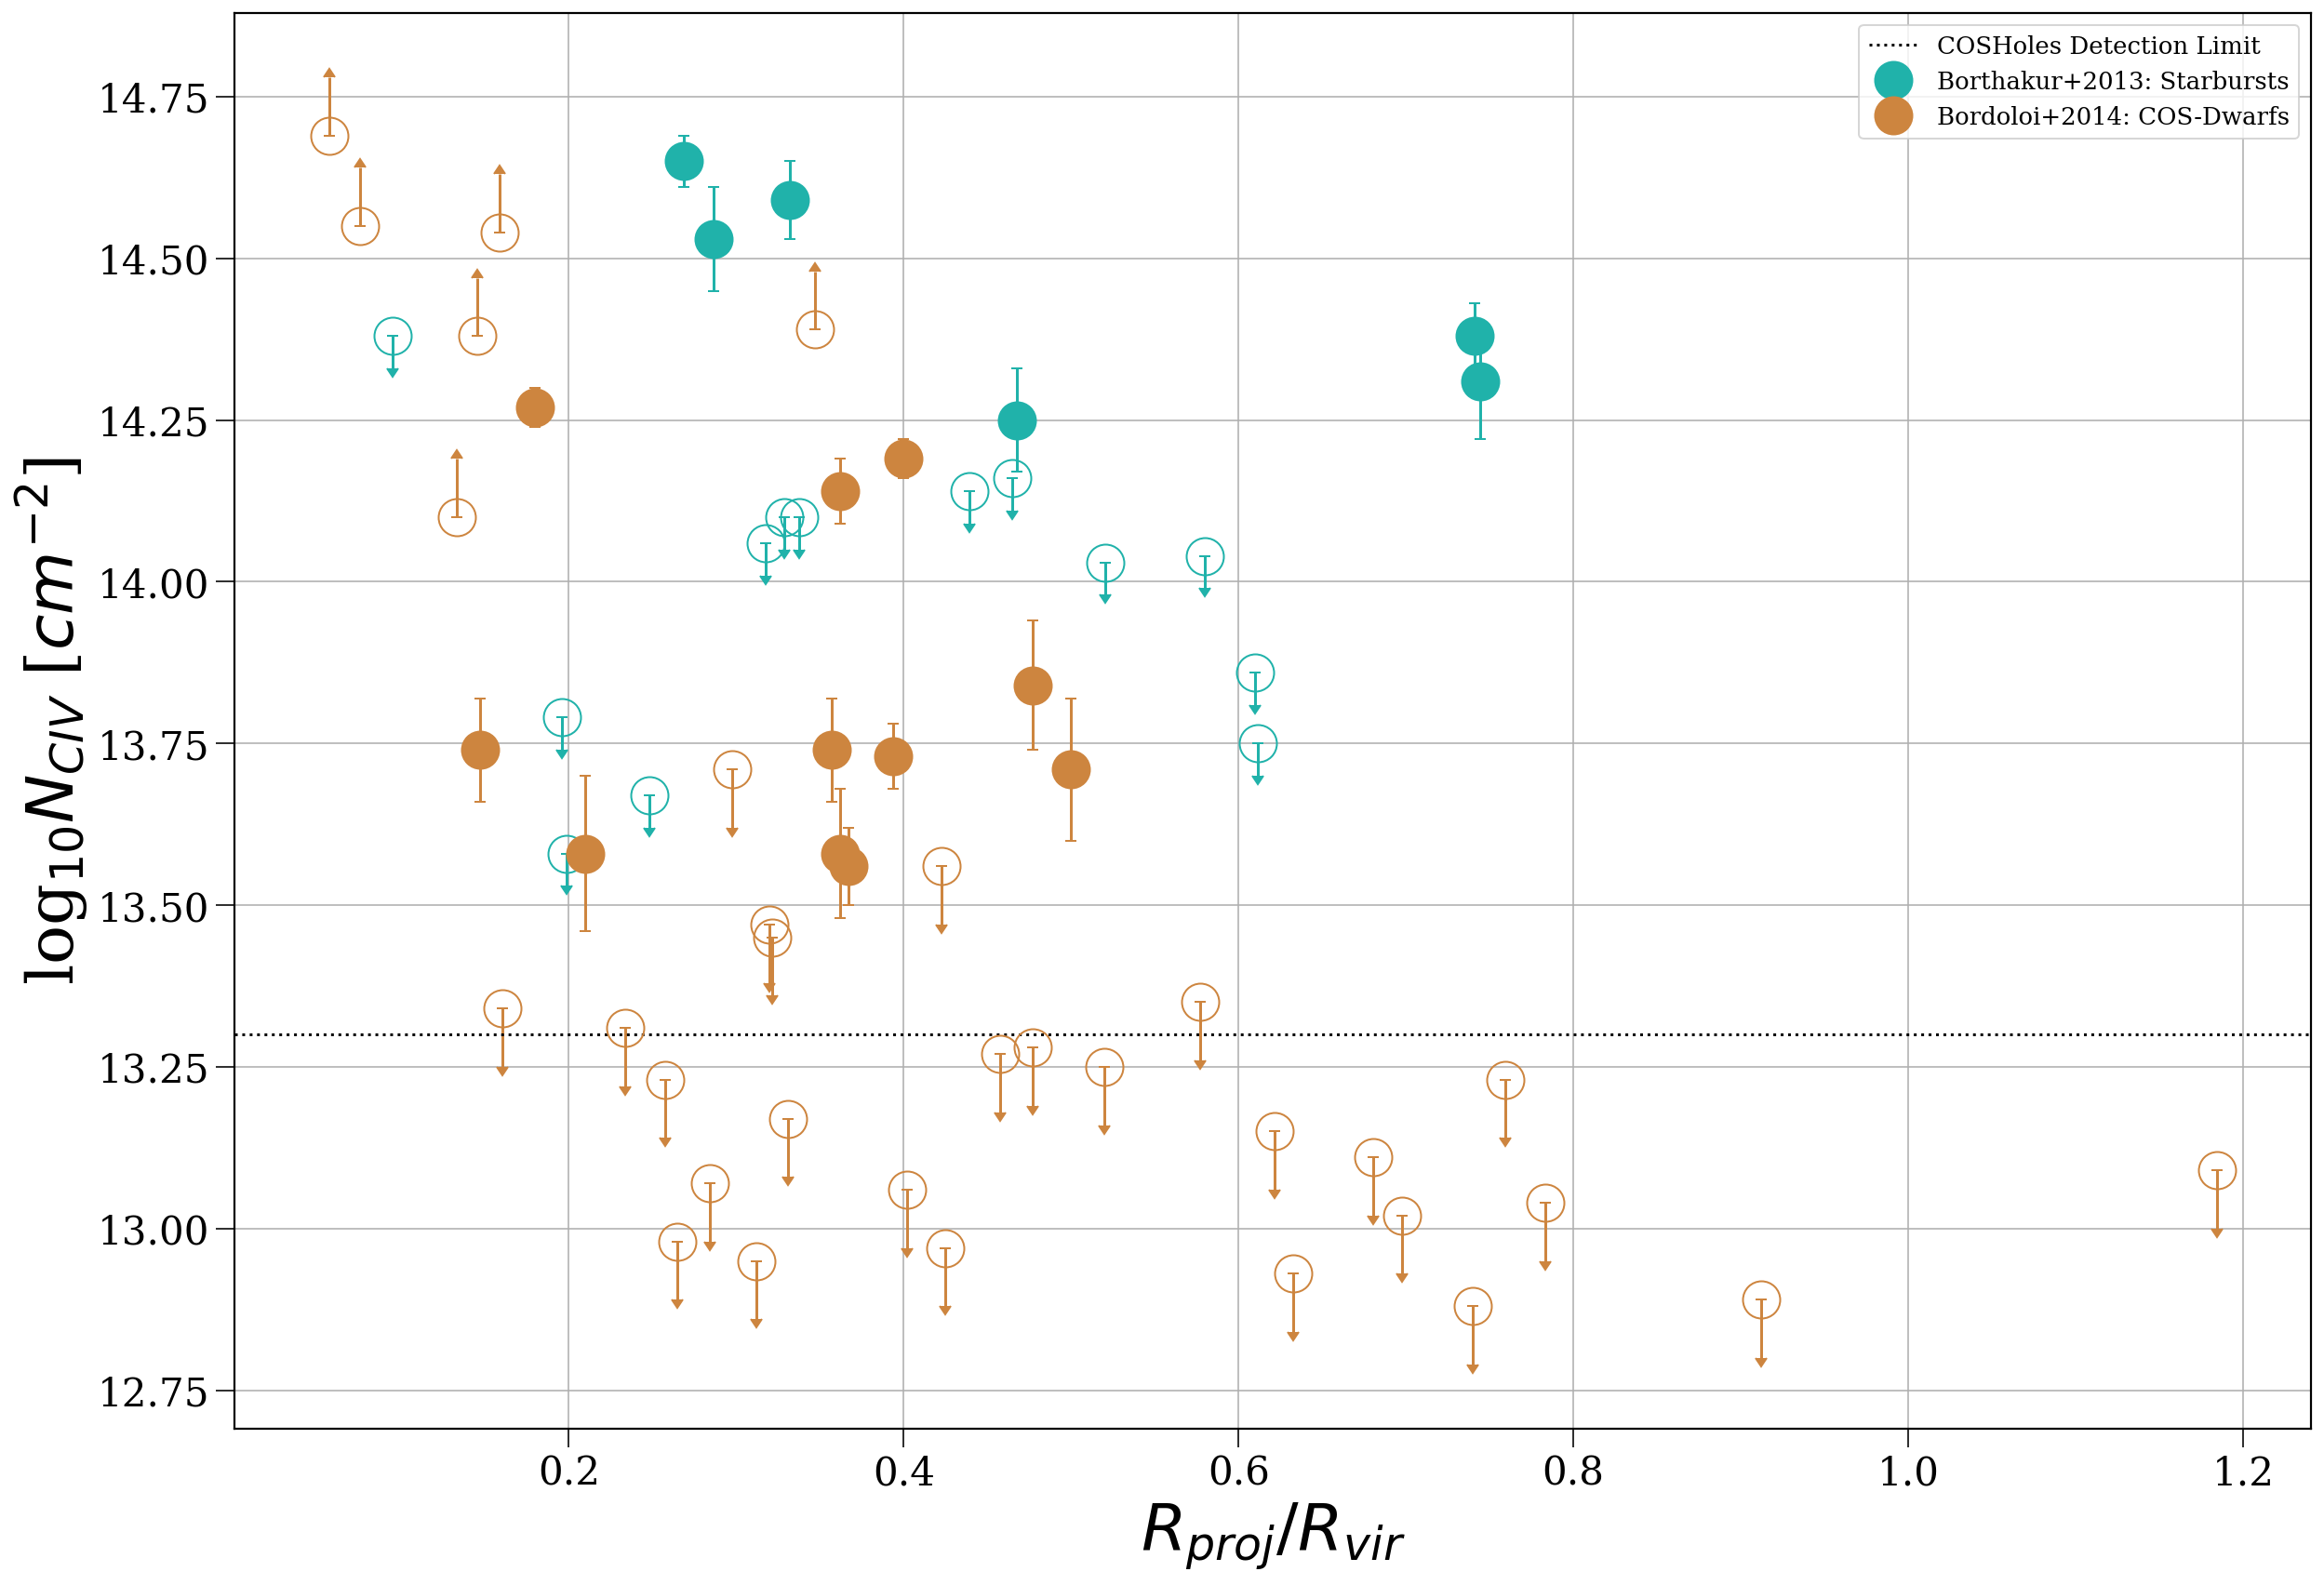

In [15]:
#Just plotting the data for fun before I start 

########Borthakur 2013
#Non-Detections
plt.errorbar(RpRv_B13[:13], civ_B13[:13], yerr = civ_err_B13[14], capsize=3, c = 'lightseagreen', 
             marker = 'o', markersize=20, ls='none', mfc='none', uplims=True)
#Detections
plt.errorbar(RpRv_B13[13:], civ_B13[13:], yerr = civ_err_B13[13:], capsize=3, c = 'lightseagreen', label = 'Borthakur+2013: Starbursts', 
             marker = 'o', markersize=20, ls='none')

#######Bordoloi 2014
#Non-Detections
plt.errorbar(RpRv_B14[:26], civ_B14[:26], yerr = civ_err_B13[15], capsize=3, c = 'peru', 
            marker = 'o', markersize = 20, ls='none', mfc='none', uplims=True)
plt.errorbar(RpRv_B14[37:], civ_B14[37:], yerr = civ_err_B13[15], capsize=3, c = 'peru', 
            marker = 'o', markersize = 20, ls='none', mfc='none', lolims=True)
#Detections
plt.errorbar(RpRv_B14[26:37], civ_B14[26:37], yerr = civ_err_B14[26:37], capsize=3, c = 'peru', label = 'Bordoloi+2014: COS-Dwarfs', 
            marker = 'o', markersize = 20, ls='none')


plt.xlabel('$R_{proj} / R_{vir}$ ')
plt.ylabel('log$_{10}N_{CIV}$ [$cm^{-2}$]')
plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.ylim(12.6,15)
#plt.xscale("log")
plt.legend()
plt.grid(True)
plt.show()

<>:7: DeprecationWarning: invalid escape sequence \l
<>:9: DeprecationWarning: invalid escape sequence \o
<>:13: DeprecationWarning: invalid escape sequence \l
<>:15: DeprecationWarning: invalid escape sequence \o
<>:44: DeprecationWarning: invalid escape sequence \p
<>:61: DeprecationWarning: invalid escape sequence \l
<>:65: DeprecationWarning: invalid escape sequence \o
<>:7: DeprecationWarning: invalid escape sequence \l
<>:9: DeprecationWarning: invalid escape sequence \o
<>:13: DeprecationWarning: invalid escape sequence \l
<>:15: DeprecationWarning: invalid escape sequence \o
<>:44: DeprecationWarning: invalid escape sequence \p
<>:61: DeprecationWarning: invalid escape sequence \l
<>:65: DeprecationWarning: invalid escape sequence \o
<>:7: DeprecationWarning: invalid escape sequence \l
<>:9: DeprecationWarning: invalid escape sequence \o
<>:13: DeprecationWarning: invalid escape sequence \l
<>:15: DeprecationWarning: invalid escape sequence \o
<>:44: DeprecationWarning: invalid

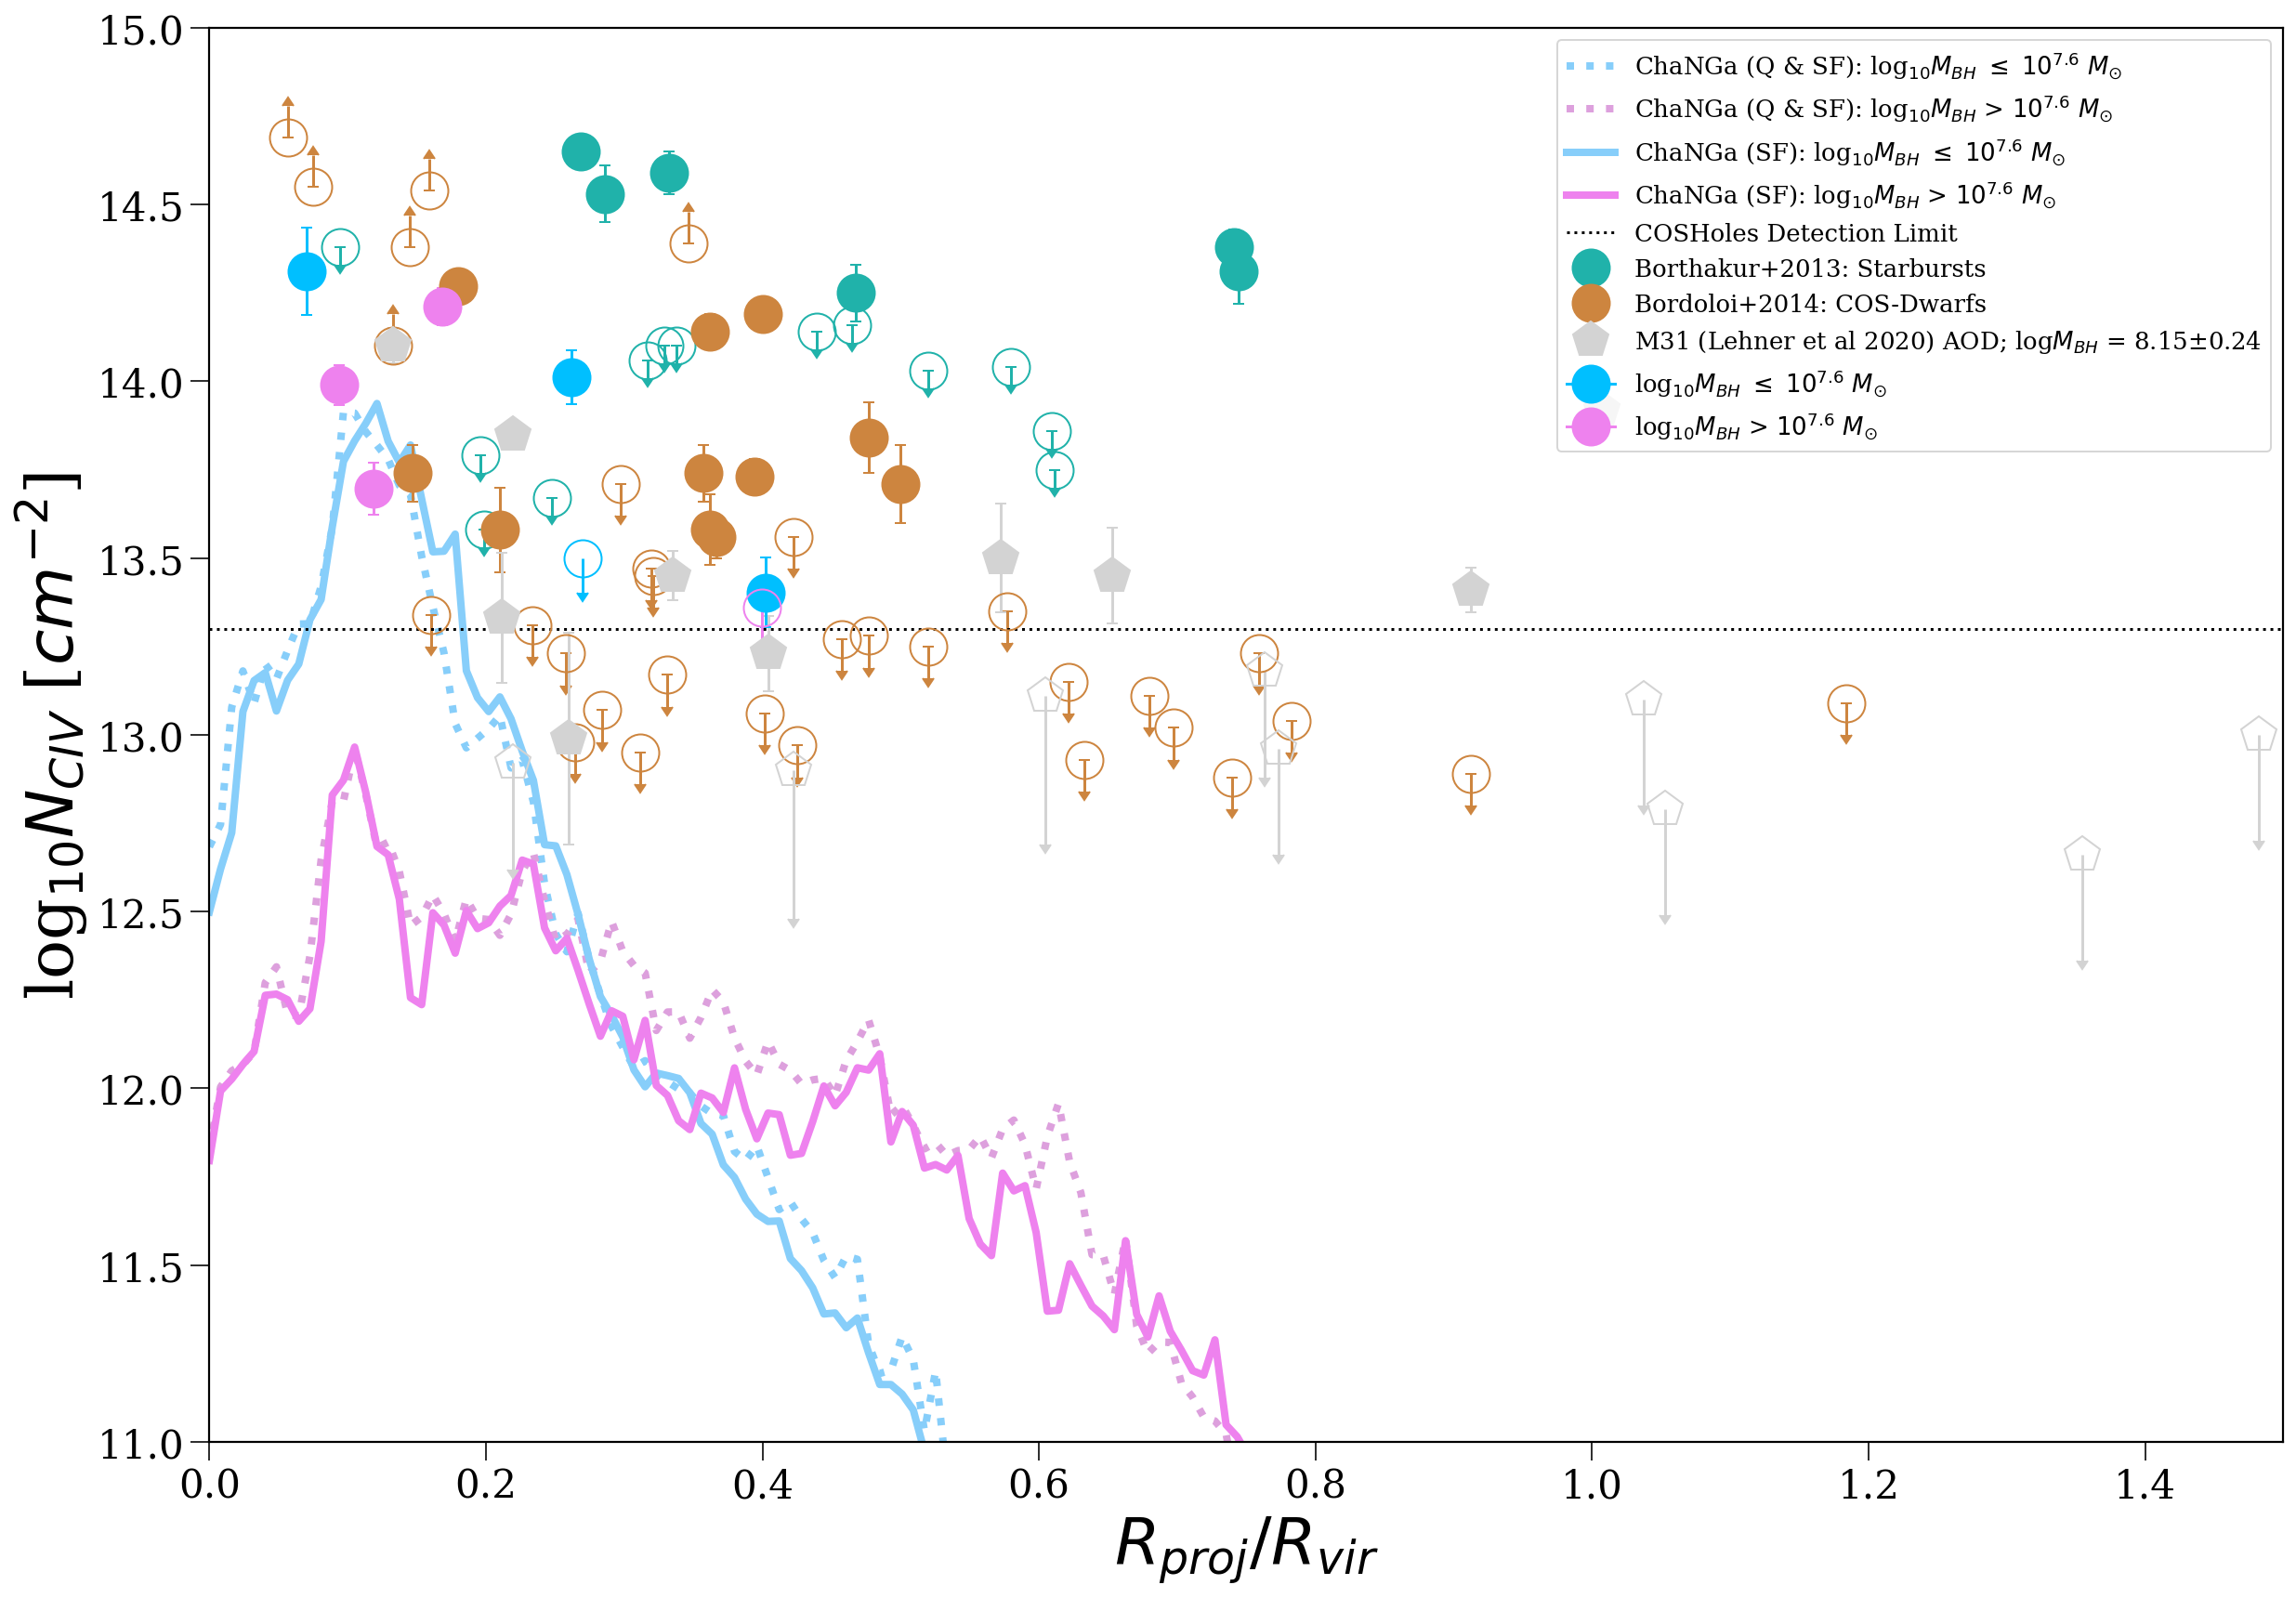

In [16]:
#Now I guess we can start plotting some things.... Lets make Fig 4 (RHS- N vs Rproj/Rvir) of COS-Holes Proposal

####################################################### MODELS 

#Plotting the models from ChaNGa: Romulus25 cosmological volume, Tremmel et. al 2017
plt.plot(r25_rprv,r25_lowBH_civ, c = 'lightskyblue', linewidth = 4, ls = ':',
         label = 'ChaNGa (Q & SF): log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$')
plt.plot(r25_rprv,r25_highBH_civ, c = 'plum', linewidth = 4, ls = ':',
         label = 'ChaNGa (Q & SF): log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$')

########### Plotting Nicole's ChaNGA Models (Starforming) => Romulus25 cosmological volume, Tremmel et. al 2017
plt.plot(CC_rprv,CC_lowBH_civ, c = 'lightskyblue', linewidth = 4, 
         label = 'ChaNGa (SF): log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$')
plt.plot(CC_rprv,CC_highBH_civ, c = 'violet', linewidth = 4, 
         label = 'ChaNGa (SF): log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$')

####################################################### LITERATURE DATA

########Borthakur 2013
#Non-Detections
plt.errorbar(RpRv_B13[:13], civ_B13[:13], yerr = civ_err_B13[14], capsize=3, c = 'lightseagreen', 
             marker = 'o', markersize=20, ls='none', mfc='none', uplims=True)
#Detections
plt.errorbar(RpRv_B13[13:], civ_B13[13:], yerr = civ_err_B13[13:], capsize=3, c = 'lightseagreen', label = 'Borthakur+2013: Starbursts', 
             marker = 'o', markersize=20, ls='none')

#######Bordoloi 2014
#Non-Detections
plt.errorbar(RpRv_B14[:26], civ_B14[:26], yerr = civ_err_B13[15], capsize=3, c = 'peru', 
            marker = 'o', markersize = 20, ls='none', mfc='none', uplims=True)
plt.errorbar(RpRv_B14[37:], civ_B14[37:], yerr = civ_err_B13[15], capsize=3, c = 'peru', 
            marker = 'o', markersize = 20, ls='none', mfc='none', lolims=True)
#Detections
plt.errorbar(RpRv_B14[26:37], civ_B14[26:37], yerr = civ_err_B14[26:37], capsize=3, c = 'peru', label = 'Bordoloi+2014: COS-Dwarfs', 
            marker = 'o', markersize = 20, ls='none')

########################################################

# M31 information from Project AMIGA: 
# BH Mass: https://arxiv.org/pdf/1707.04001.pdf = 8.15+/- 0.24 

##### M31 Detections (Sums) 
plt.errorbar (amiga_det_RRvir, amiga_2_det_sum['logN'], yerr=amiga_2_det_sum['sum_elogN'],capsize = 3, c = 'lightgrey', 
              marker="p", markersize=20, label='M31 (Lehner et al 2020) AOD; log$M_{BH}$ = 8.15$\pm$0.24', ls='none')

##### M31 Upper Limits (Sums)
plt.errorbar (amiga_up_RRvir, amiga_2_up_sum['logN'], yerr=amiga_2_up_sum['sum_elogN'],uplims=True, c = 'lightgrey', 
              marker="p",mfc='none',markersize=20, ls='none')

#######################################################

########### Plotting COS-Holes Data

#J1159
plt.errorbar(rproj[1]/rvir[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
plt.errorbar(rproj[4]/rvir[4], np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             capsize = 3, c = 'deepskyblue',label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1051
plt.errorbar(rproj[5]/rvir[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6],capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(rproj[6]/rvir[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2],capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(rproj[7]/rvir[7], civ_df_J0246['N'][2], civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now )
plt.errorbar(rproj[0]/rvir[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], c = 'deepskyblue', 
             marker=".", markersize=40, capsize = 3)

#J1222 - NGC 4248 (3)
plt.errorbar (rproj[3]/rvir[3], np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)

#J1235 - NGC 4564 (8)
plt.errorbar (rproj[8]/rvir[8], np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'violet', 
              marker=".",mfc='none',markersize=40)

plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.axvline(150, c='k', ls='-')
plt.ylim(11, 15)
plt.xlim(0, 1.5)
plt.xlabel ('$R_{proj}/R_{vir}$')
plt.ylabel ('log$_{10}N_{CIV}$ [$cm^{-2}$]')
plt.legend(loc=1)
#plt.grid(True)
plt.show()

<>:8: DeprecationWarning: invalid escape sequence \o
<>:10: DeprecationWarning: invalid escape sequence \l
<>:21: DeprecationWarning: invalid escape sequence \p
<>:56: DeprecationWarning: invalid escape sequence \l
<>:60: DeprecationWarning: invalid escape sequence \o
<>:8: DeprecationWarning: invalid escape sequence \o
<>:10: DeprecationWarning: invalid escape sequence \l
<>:21: DeprecationWarning: invalid escape sequence \p
<>:56: DeprecationWarning: invalid escape sequence \l
<>:60: DeprecationWarning: invalid escape sequence \o
<>:8: DeprecationWarning: invalid escape sequence \o
<>:10: DeprecationWarning: invalid escape sequence \l
<>:21: DeprecationWarning: invalid escape sequence \p
<>:56: DeprecationWarning: invalid escape sequence \l
<>:60: DeprecationWarning: invalid escape sequence \o
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_1004/532118686.py:8: DeprecationWarning: invalid escape sequence \o
  plt.plot(b_benHbh, med_benHbh, color = 'violet', lw = 3, label =

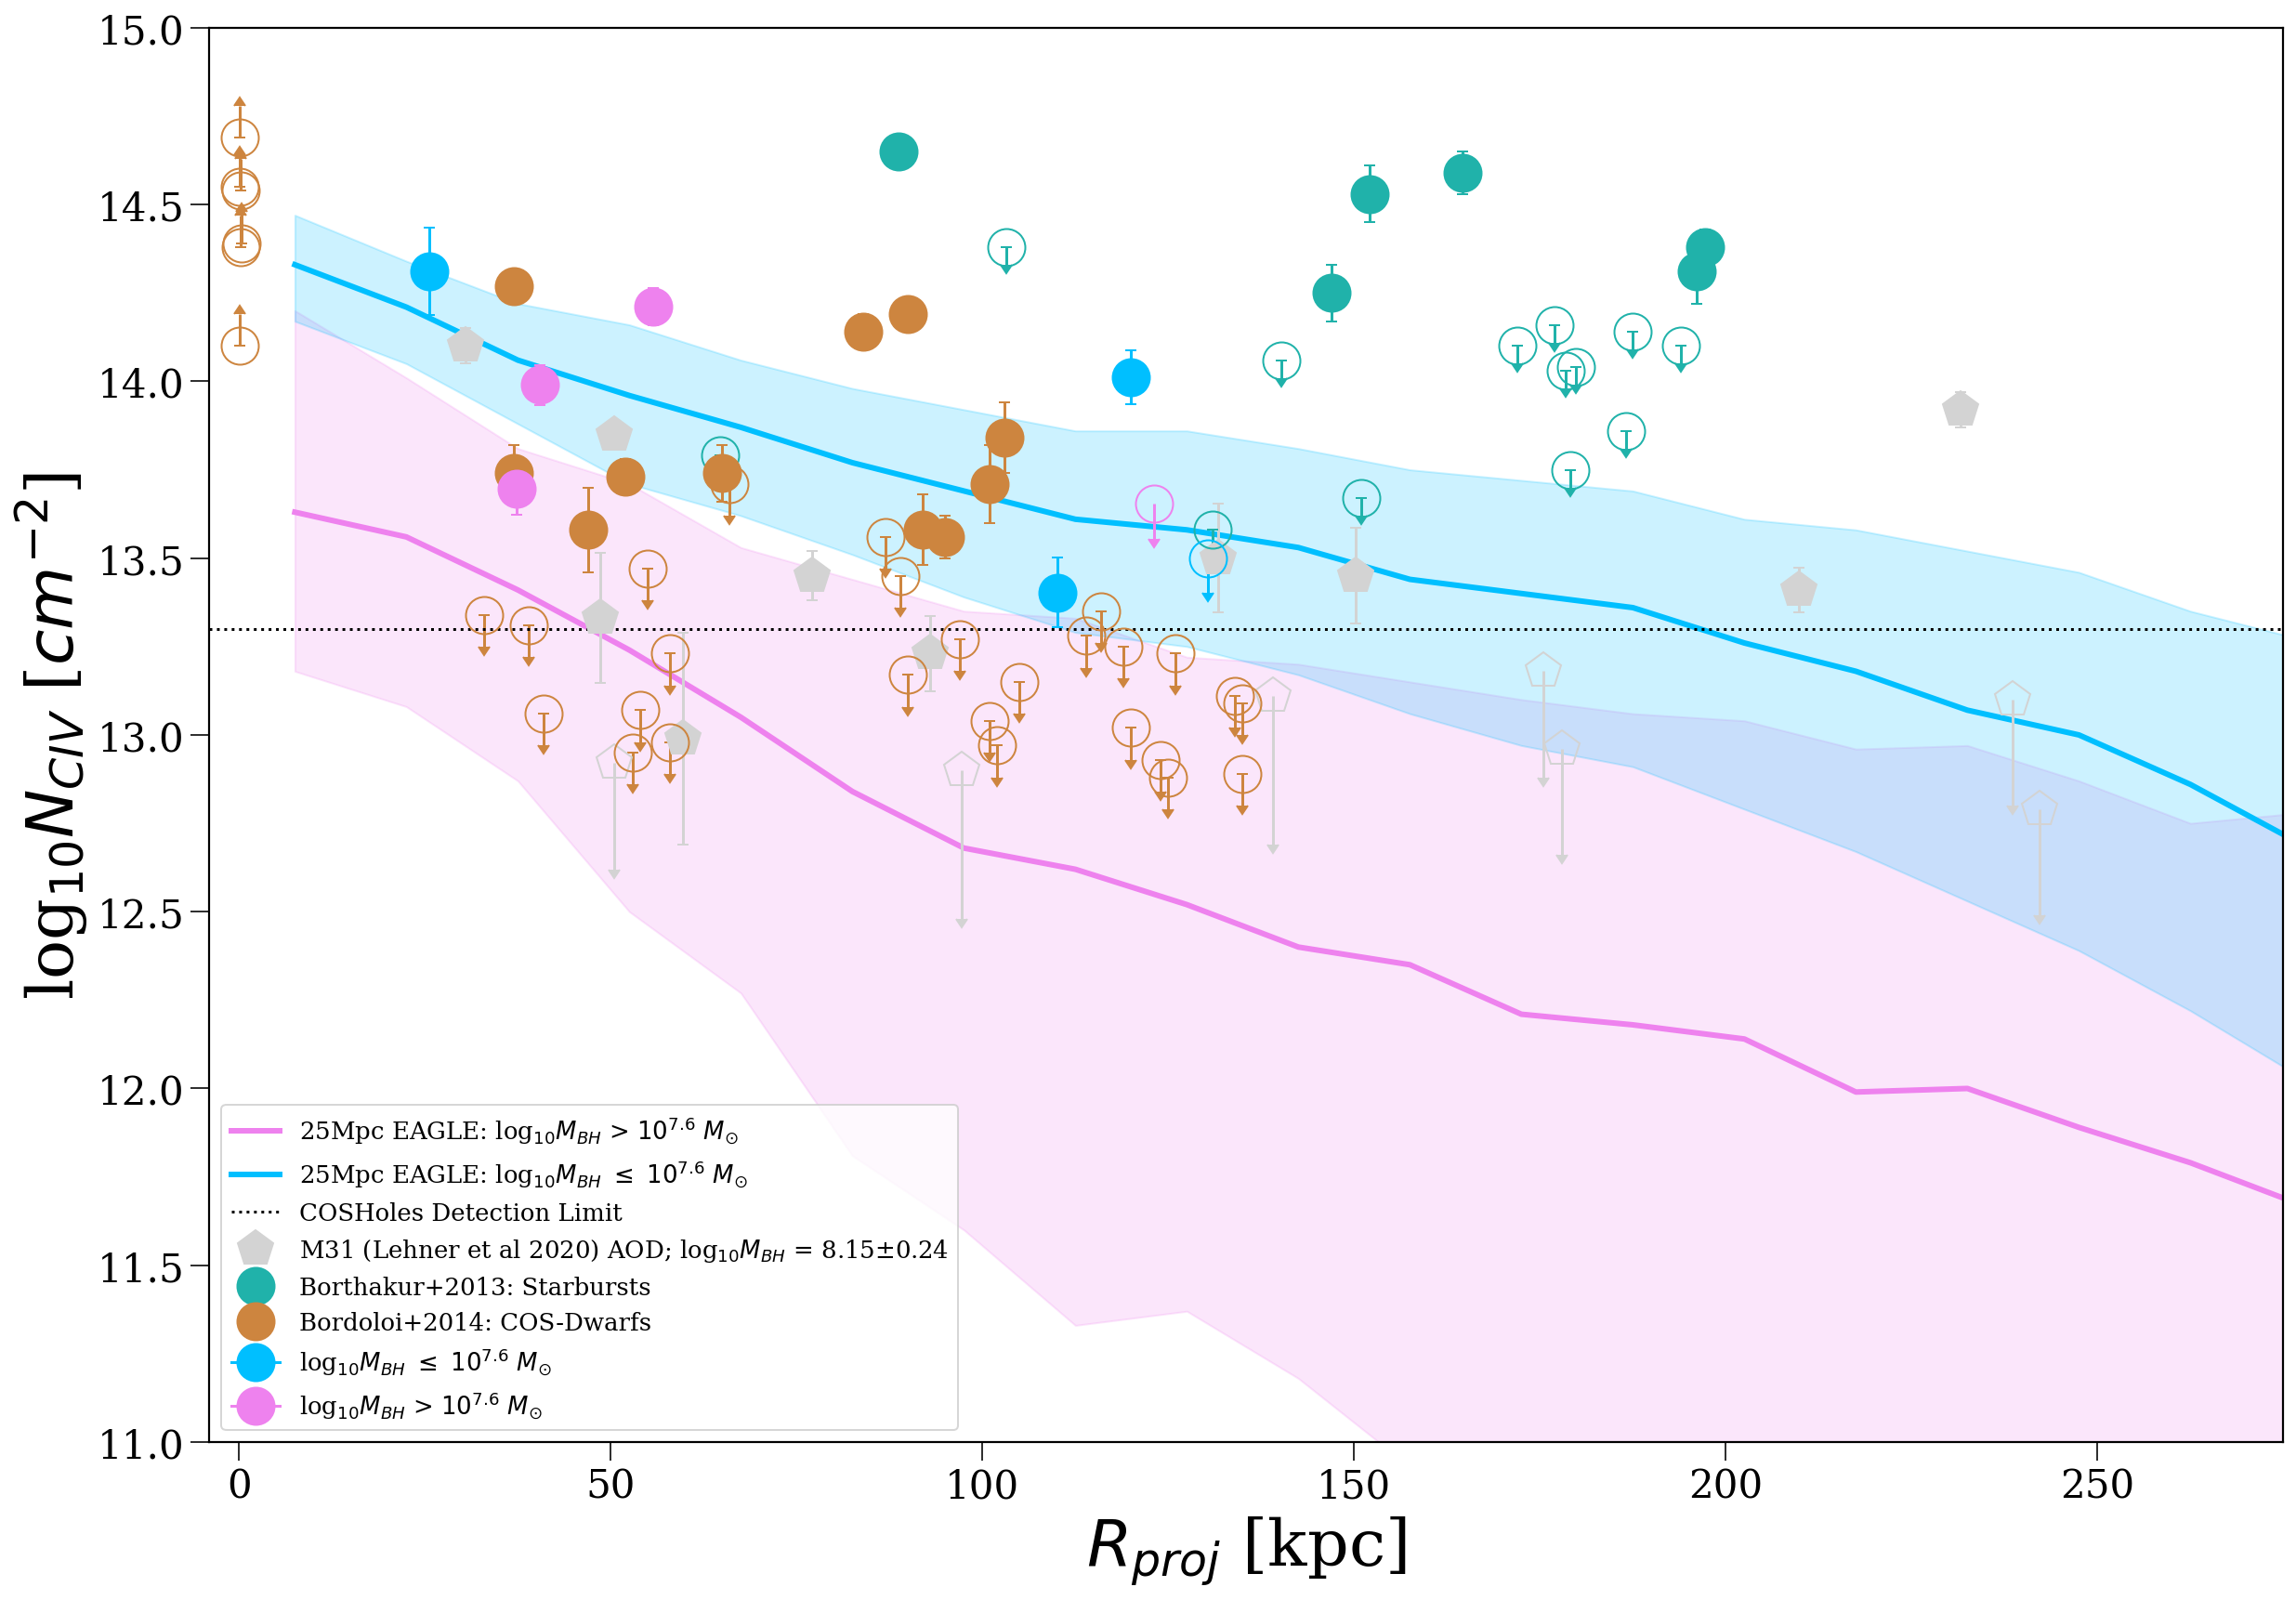

In [17]:
#Now I guess we can start plotting some things.... Lets make Fig 4 (LHS- N vs Rproj) of COS-Holes Proposal

####################################################### MODEL

########### Plotting Ben's Data 

plt.fill_between(b_benHbh, ben_25Hbh, ben_75Hbh, alpha = 0.2, color = 'violet')
plt.plot(b_benHbh, med_benHbh, color = 'violet', lw = 3, label = '25Mpc EAGLE: log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$')
plt.fill_between(b_benLbh, ben_25Lbh, ben_75Lbh, alpha = 0.2, color = 'deepskyblue')
plt.plot(b_benLbh, med_benLbh, color = 'deepskyblue', lw = 3, label = '25Mpc EAGLE: log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$')

plt.figure(1, figsize=(12,8))

######################################################## LITERATURE DATA

# M31 information from Project AMIGA: 
# BH Mass: https://arxiv.org/pdf/1707.04001.pdf = 8.15+/- 0.24 

##### M31 Detections (Sums) 
plt.errorbar (amiga_2_det_sum['Rad'], amiga_2_det_sum['logN'], yerr=amiga_2_det_sum['sum_elogN'],capsize = 3, c = 'lightgrey', 
              marker="p", markersize=20, label='M31 (Lehner et al 2020) AOD; log$_{10}M_{BH}$ = 8.15$\pm$0.24', ls='none')

##### M31 Upper Limits (Sums)
plt.errorbar (amiga_2_up_sum['Rad'], amiga_2_up_sum['logN'], yerr=amiga_2_up_sum['sum_elogN'],uplims=True, c = 'lightgrey', 
              marker="p",mfc='none',markersize=20, ls='none')

########Borthakur 2013
#Non-Detections
plt.errorbar(Rp_B13[:13], civ_B13[:13], yerr = civ_err_B13[14], capsize=3, c = 'lightseagreen', 
             marker = 'o', markersize=20, ls='none', mfc='none', uplims=True)
#Detections
plt.errorbar(Rp_B13[13:], civ_B13[13:], yerr = civ_err_B13[13:], capsize=3, c = 'lightseagreen', label = 'Borthakur+2013: Starbursts', 
             marker = 'o', markersize=20, ls='none')

#######Bordoloi 2014
#Non-Detections
plt.errorbar(Rp_B14[:26], civ_B14[:26], yerr = civ_err_B13[15], capsize=3, c = 'peru', 
            marker = 'o', markersize = 20, ls='none', mfc='none', uplims=True)
plt.errorbar(RpRv_B14[37:], civ_B14[37:], yerr = civ_err_B13[15], capsize=3, c = 'peru', 
            marker = 'o', markersize = 20, ls='none', mfc='none', lolims=True)
#Detections
plt.errorbar(Rp_B14[26:37], civ_B14[26:37], yerr = civ_err_B14[26:37], capsize=3, c = 'peru', label = 'Bordoloi+2014: COS-Dwarfs', 
            marker = 'o', markersize = 20, ls='none')

########################################################

########### Plotting COS-Holes Data

#J1159
plt.errorbar(rproj[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
plt.errorbar(rproj[4], np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1051
plt.errorbar(rproj[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6],capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(rproj[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2],capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(rproj[7], civ_df_J0246['N'][2], civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now)
plt.errorbar(rproj[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], c = 'deepskyblue', 
             marker=".", markersize=40, capsize = 3)

#J1222 - NGC 4248 (3)
plt.errorbar (rproj[3], np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)

#J1235 - NGC 4564 (8)
plt.errorbar (rproj[8], np.log10(10**13.17+10**13.48), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'violet', 
              marker=".",mfc='none',markersize=40)

plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.axvline(150, c='k', ls='-')
plt.ylim(11, 15)
plt.xlim(-4,275)
plt.xlabel ('$R_{proj}$ [kpc]')
plt.ylabel ('log$_{10}N_{CIV}$ [$cm^{-2}$]')
plt.legend(loc=3)
#plt.grid(True)
plt.show()

### Setting up Stellar Mass Bins 

Since we are still seeing a null result I want to investigate how the stellar mass may be impacting the sample so will split the larger sample into 2 stellar mass bins and use data from 0-150 kpc (since that is where we see the most "consistency"

The bins are just gonna be 10^9-10 and 10^10-11, going to see what this looks like first and then maybe just keep up to 150 kpc 

In [18]:
####### BORTHAKUR ######### => Only has high stellar mass bin values 

borthakur_less150 = borthakur_no_zero.loc[(borthakur_no_zero['rhokpc[i]'] <= 150)]
#borthakur_less150
borthakur_high = borthakur_less150
borthakur_high

,galname[i],mstar[i],alog10(mhalo[i]),rvir[i],rhokpc[i],rhokpc[i]/rvir[i],logNCIV[i],err,det
17,J161708.92+063822.2,11.39,13.585581,1090.91560,103.2,0.094599,14.38,0.00,0
16,J154527.12+484642.2,10.50,12.029020,330.32571,64.7,0.195867,13.79,0.00,0
13,J132150.89+033034.1,10.81,12.408067,441.86569,140.2,0.317291,14.06,0.00,0
19,J230842.91-091112.8,11.09,12.928177,658.65584,131.0,0.198890,13.58,0.00,0
8,J102846.43+391842.9,10.50,12.029020,330.32571,88.7,0.268523,14.65,0.04,1
14,J140502.20+470525.9,10.43,11.964435,314.35077,146.9,0.467312,14.25,0.08,1


In [19]:
####### BORDOLOI ######### 

bordoloi_less150 = bordoloi.loc[(bordoloi['R[kpc]'] <= 150) & (bordoloi['logM*'] >= 9) ]
#bordoloi_less150

#separating into low and high sample
bordoloi_low = bordoloi_less150.loc[(bordoloi_less150['logM*'] >= 9) & (bordoloi_less150['logM*'] < 10)]
bordoloi_high = bordoloi_less150.loc[(bordoloi_less150['logM*'] >= 10)]

bordoloi_high

,QSO,logNCIV,err,det,logM*,R[kpc],Rvir[kpc],R/Rvir
25,J1211+3657,13.17,0.00,0,10.1,90,272,0.330882
26,J1121+0325,13.45,0.00,0,10.1,89,277,0.321300
1,J09525+4535,13.56,0.06,1,10.0,95,259,0.366795
15,PG1202+281,13.58,0.10,1,10.0,92,254,0.362205
12,J0959+0503,14.69,0.00,2,10.0,14,247,0.056680


In [20]:
bordoloi_low

,QSO,logNCIV,err,det,logM*,R[kpc],Rvir[kpc],R/Rvir
21,PG1049-005,12.98,0.00,0,9.6,58,219,0.264840
24,J1342+0505,13.35,0.00,0,9.4,116,201,0.577114
28,J0155+0857,13.15,0.00,0,9.0,105,169,0.621302
22,J1521+0337,13.56,0.00,0,9.5,87,206,0.422330
33,J0946+4711,13.71,0.00,0,9.6,66,222,0.297297
34,J1022+0132,13.31,0.00,0,9.1,39,167,0.233533
35,J1616+4154,13.47,0.00,0,9.2,55,172,0.319767
36,J1356+2515,13.27,0.00,0,9.6,97,212,0.457547
37,J1210+3157,13.11,0.00,0,9.3,134,197,0.680203
38,J1117+2634,13.28,0.00,0,9.8,114,239,0.476987


<>:22: DeprecationWarning: invalid escape sequence \l
<>:52: DeprecationWarning: invalid escape sequence \l
<>:56: DeprecationWarning: invalid escape sequence \o
<>:84: DeprecationWarning: invalid escape sequence \l
<>:22: DeprecationWarning: invalid escape sequence \l
<>:52: DeprecationWarning: invalid escape sequence \l
<>:56: DeprecationWarning: invalid escape sequence \o
<>:84: DeprecationWarning: invalid escape sequence \l
<>:22: DeprecationWarning: invalid escape sequence \l
<>:52: DeprecationWarning: invalid escape sequence \l
<>:56: DeprecationWarning: invalid escape sequence \o
<>:84: DeprecationWarning: invalid escape sequence \l
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_1004/1454564707.py:22: DeprecationWarning: invalid escape sequence \l
  axs[0].annotate('$10^{9}$ $\leq$ log$_{10}M_{*}$ [$M_{\odot}$] < $10^{10}$: 8 detections (5 lowlim Det)', (0.5, 12.6), fontsize=20)
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_1004/1454564707.py:52: Depreca

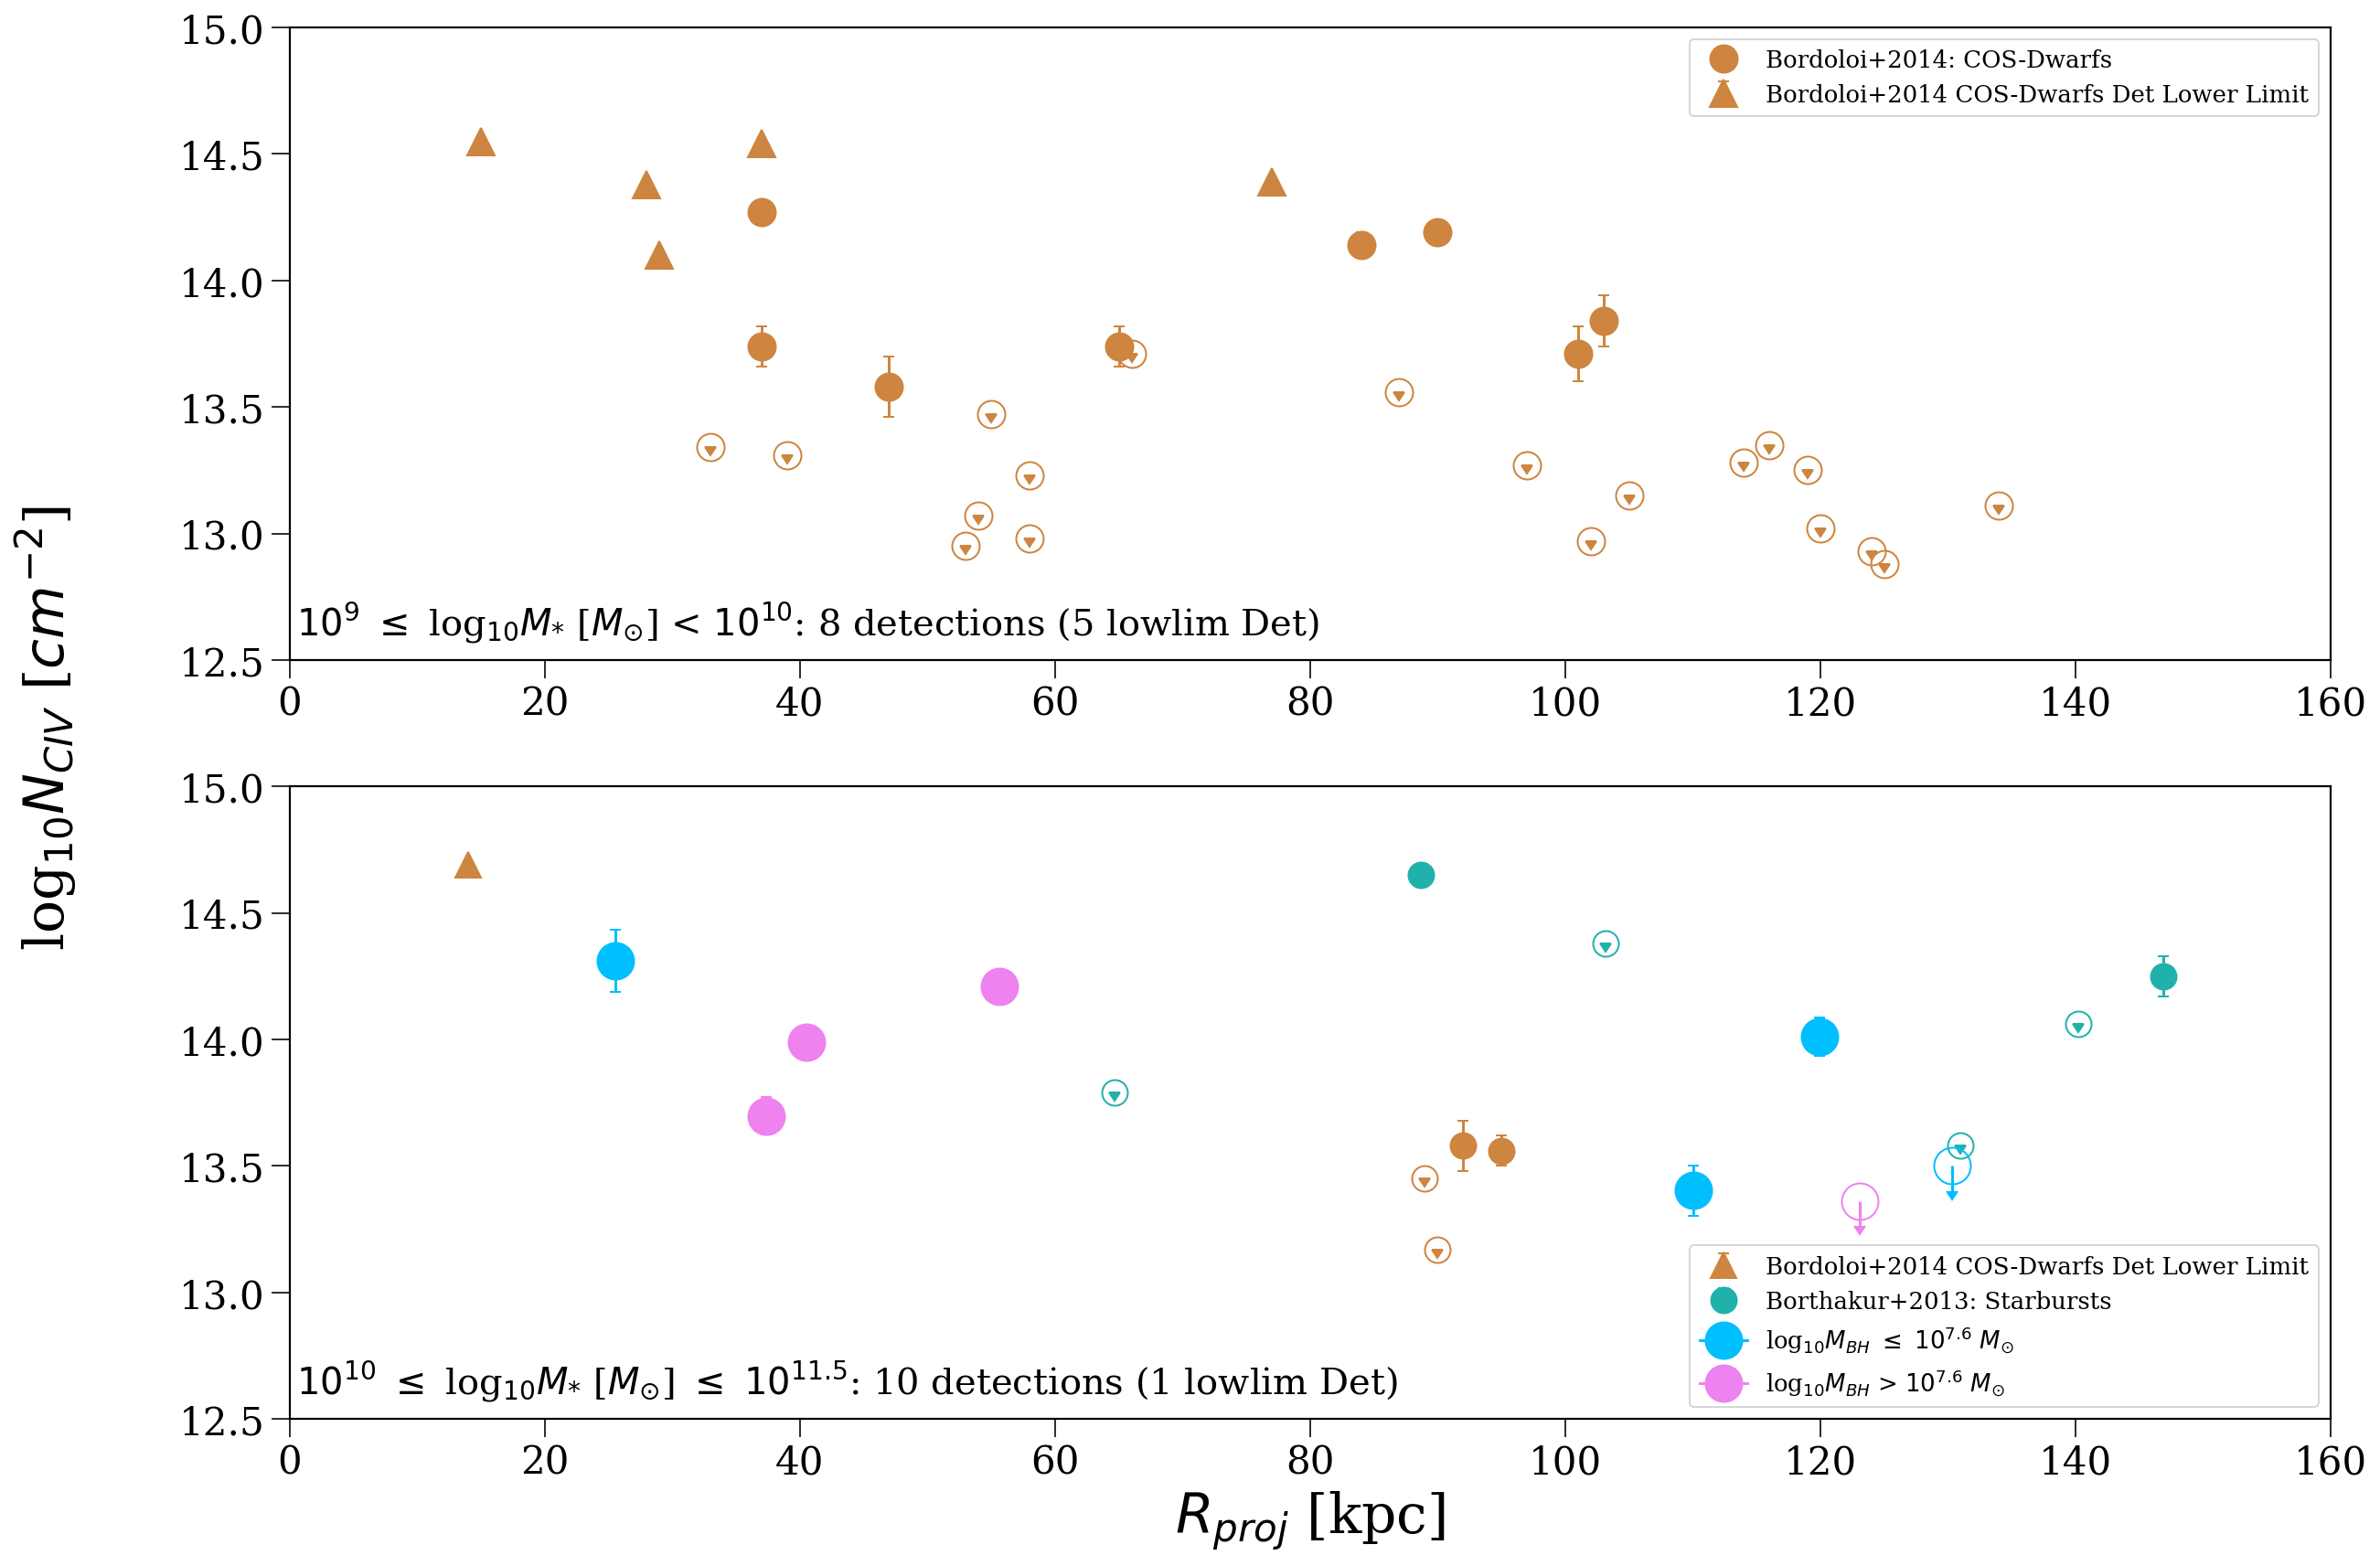

In [21]:
#This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
fig, axs = plt.subplots(2)
#handles, labels = ax.get_legend_handles_labels()
fig.supylabel('log$_{10}N_{CIV}$ [$cm^{-2}$]', fontsize=30)

################ Low Bin Stellar Mass ##############

###### Bordoloi ###### 
#Non-Detections 
axs[0].errorbar(bordoloi_low['R[kpc]'][:19], bordoloi_low['logNCIV'][:19], yerr = bordoloi_low['err'][:19], capsize=3, c = 'peru', 
            marker = 'o', markersize = 15, ls='none', mfc='none', uplims=True) #upper limit

#Detections
axs[0].errorbar(bordoloi_low['R[kpc]'][19:27], bordoloi_low['logNCIV'][19:27], yerr = bordoloi_low['err'][19:27], capsize=3, c = 'peru', 
            marker = 'o', markersize = 15, ls='none', label = 'Bordoloi+2014: COS-Dwarfs') #upper limit
axs[0].errorbar(bordoloi_low['R[kpc]'][27:], bordoloi_low['logNCIV'][27:], yerr = bordoloi_low['err'][27:], capsize=3, c = 'peru', 
            marker = '^', markersize = 15, ls='none', lolims=True, label = 'Bordoloi+2014 COS-Dwarfs Det Lower Limit') #lower limit

axs[0].set_ylim(12.5,15)
axs[0].set_xlim(0,160)
#axs[0].set_title('Only using out to $R_{proj}$ $\leq$ 150 kpc', fontsize=30)
axs[0].annotate('$10^{9}$ $\leq$ log$_{10}M_{*}$ [$M_{\odot}$] < $10^{10}$: 8 detections (5 lowlim Det)', (0.5, 12.6), fontsize=20)
axs[0].legend(loc=1)

############### High Bin Stellar Mass ##############

#####Non-Detections (Upper limit = 1, Lower Limit = 2)
    #Bordoloi
axs[1].errorbar(bordoloi_high['R[kpc]'][:2], bordoloi_high['logNCIV'][:2], yerr = bordoloi_high['err'][:2], capsize=3, c = 'peru', 
            marker = 'o', markersize = 14, ls='none', mfc='none', uplims=True) #upper limit
axs[1].errorbar(bordoloi_high['R[kpc]'][4:], bordoloi_high['logNCIV'][4:], yerr = bordoloi_high['err'][4:], capsize=3, c = 'peru', 
            marker = '^', markersize = 14, ls='none', lolims=True, label = 'Bordoloi+2014 COS-Dwarfs Det Lower Limit') #lower limit 
    #Borthakur 
axs[1].errorbar(borthakur_high['rhokpc[i]'][:4], borthakur_high['logNCIV[i]'][:4], yerr = borthakur_high['err'][:4], capsize=3, 
                c = 'lightseagreen', marker = 'o', markersize = 14, ls='none', mfc='none', uplims=True) #upper limit
######Detections
    #Bordoloi (1)
axs[1].errorbar(bordoloi_high['R[kpc]'][2:4], bordoloi_high['logNCIV'][2:4], yerr = bordoloi_high['err'][2:4], capsize=3, c = 'peru', 
            marker = 'o', markersize = 14, ls='none')
    #Borthakur (1)
axs[1].errorbar(borthakur_high['rhokpc[i]'][4:], borthakur_high['logNCIV[i]'][4:], yerr = borthakur_high['err'][4:], capsize=3, 
                c = 'lightseagreen', marker = 'o', markersize = 14, ls='none', label = 'Borthakur+2013: Starbursts') 

#####COS-HOLES DATA#####
#J1159
plt.errorbar(rproj[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
plt.errorbar(rproj[4], np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1051
plt.errorbar(rproj[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6],capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(rproj[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2],capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(rproj[7], civ_df_J0246['N'][2], civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now)
plt.errorbar(rproj[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], c = 'deepskyblue', 
             marker=".", markersize=40, capsize = 3)

#J1235 - NGC 4564 (8)
plt.errorbar (rproj[8], np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'violet', 
              marker=".",mfc='none',markersize=40)

#J1222 - NGC 4248 (3)
axs[1].errorbar (rproj[3], np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)

axs[1].set_xlim(0,160)
axs[1].set_ylim(12.5,15)
axs[1].legend(loc=4)
axs[1].annotate('$10^{10}$ $\leq$ log$_{10}M_{*}$ [$M_{\odot}$] $\leq$ $10^{11.5}$: 10 detections (1 lowlim Det)', (0.5, 12.6), fontsize=20)
axs[1].set_xlabel('$R_{proj}$ [kpc]', fontsize=30)
plt.show()

<>:18: DeprecationWarning: invalid escape sequence \l
<>:19: DeprecationWarning: invalid escape sequence \l
<>:54: DeprecationWarning: invalid escape sequence \l
<>:58: DeprecationWarning: invalid escape sequence \o
<>:82: DeprecationWarning: invalid escape sequence \l
<>:18: DeprecationWarning: invalid escape sequence \l
<>:19: DeprecationWarning: invalid escape sequence \l
<>:54: DeprecationWarning: invalid escape sequence \l
<>:58: DeprecationWarning: invalid escape sequence \o
<>:82: DeprecationWarning: invalid escape sequence \l
<>:18: DeprecationWarning: invalid escape sequence \l
<>:19: DeprecationWarning: invalid escape sequence \l
<>:54: DeprecationWarning: invalid escape sequence \l
<>:58: DeprecationWarning: invalid escape sequence \o
<>:82: DeprecationWarning: invalid escape sequence \l
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_1004/758474423.py:18: DeprecationWarning: invalid escape sequence \l
  axs[0].set_title('Only using out to $R_{proj}$ $\leq$ 150 kp

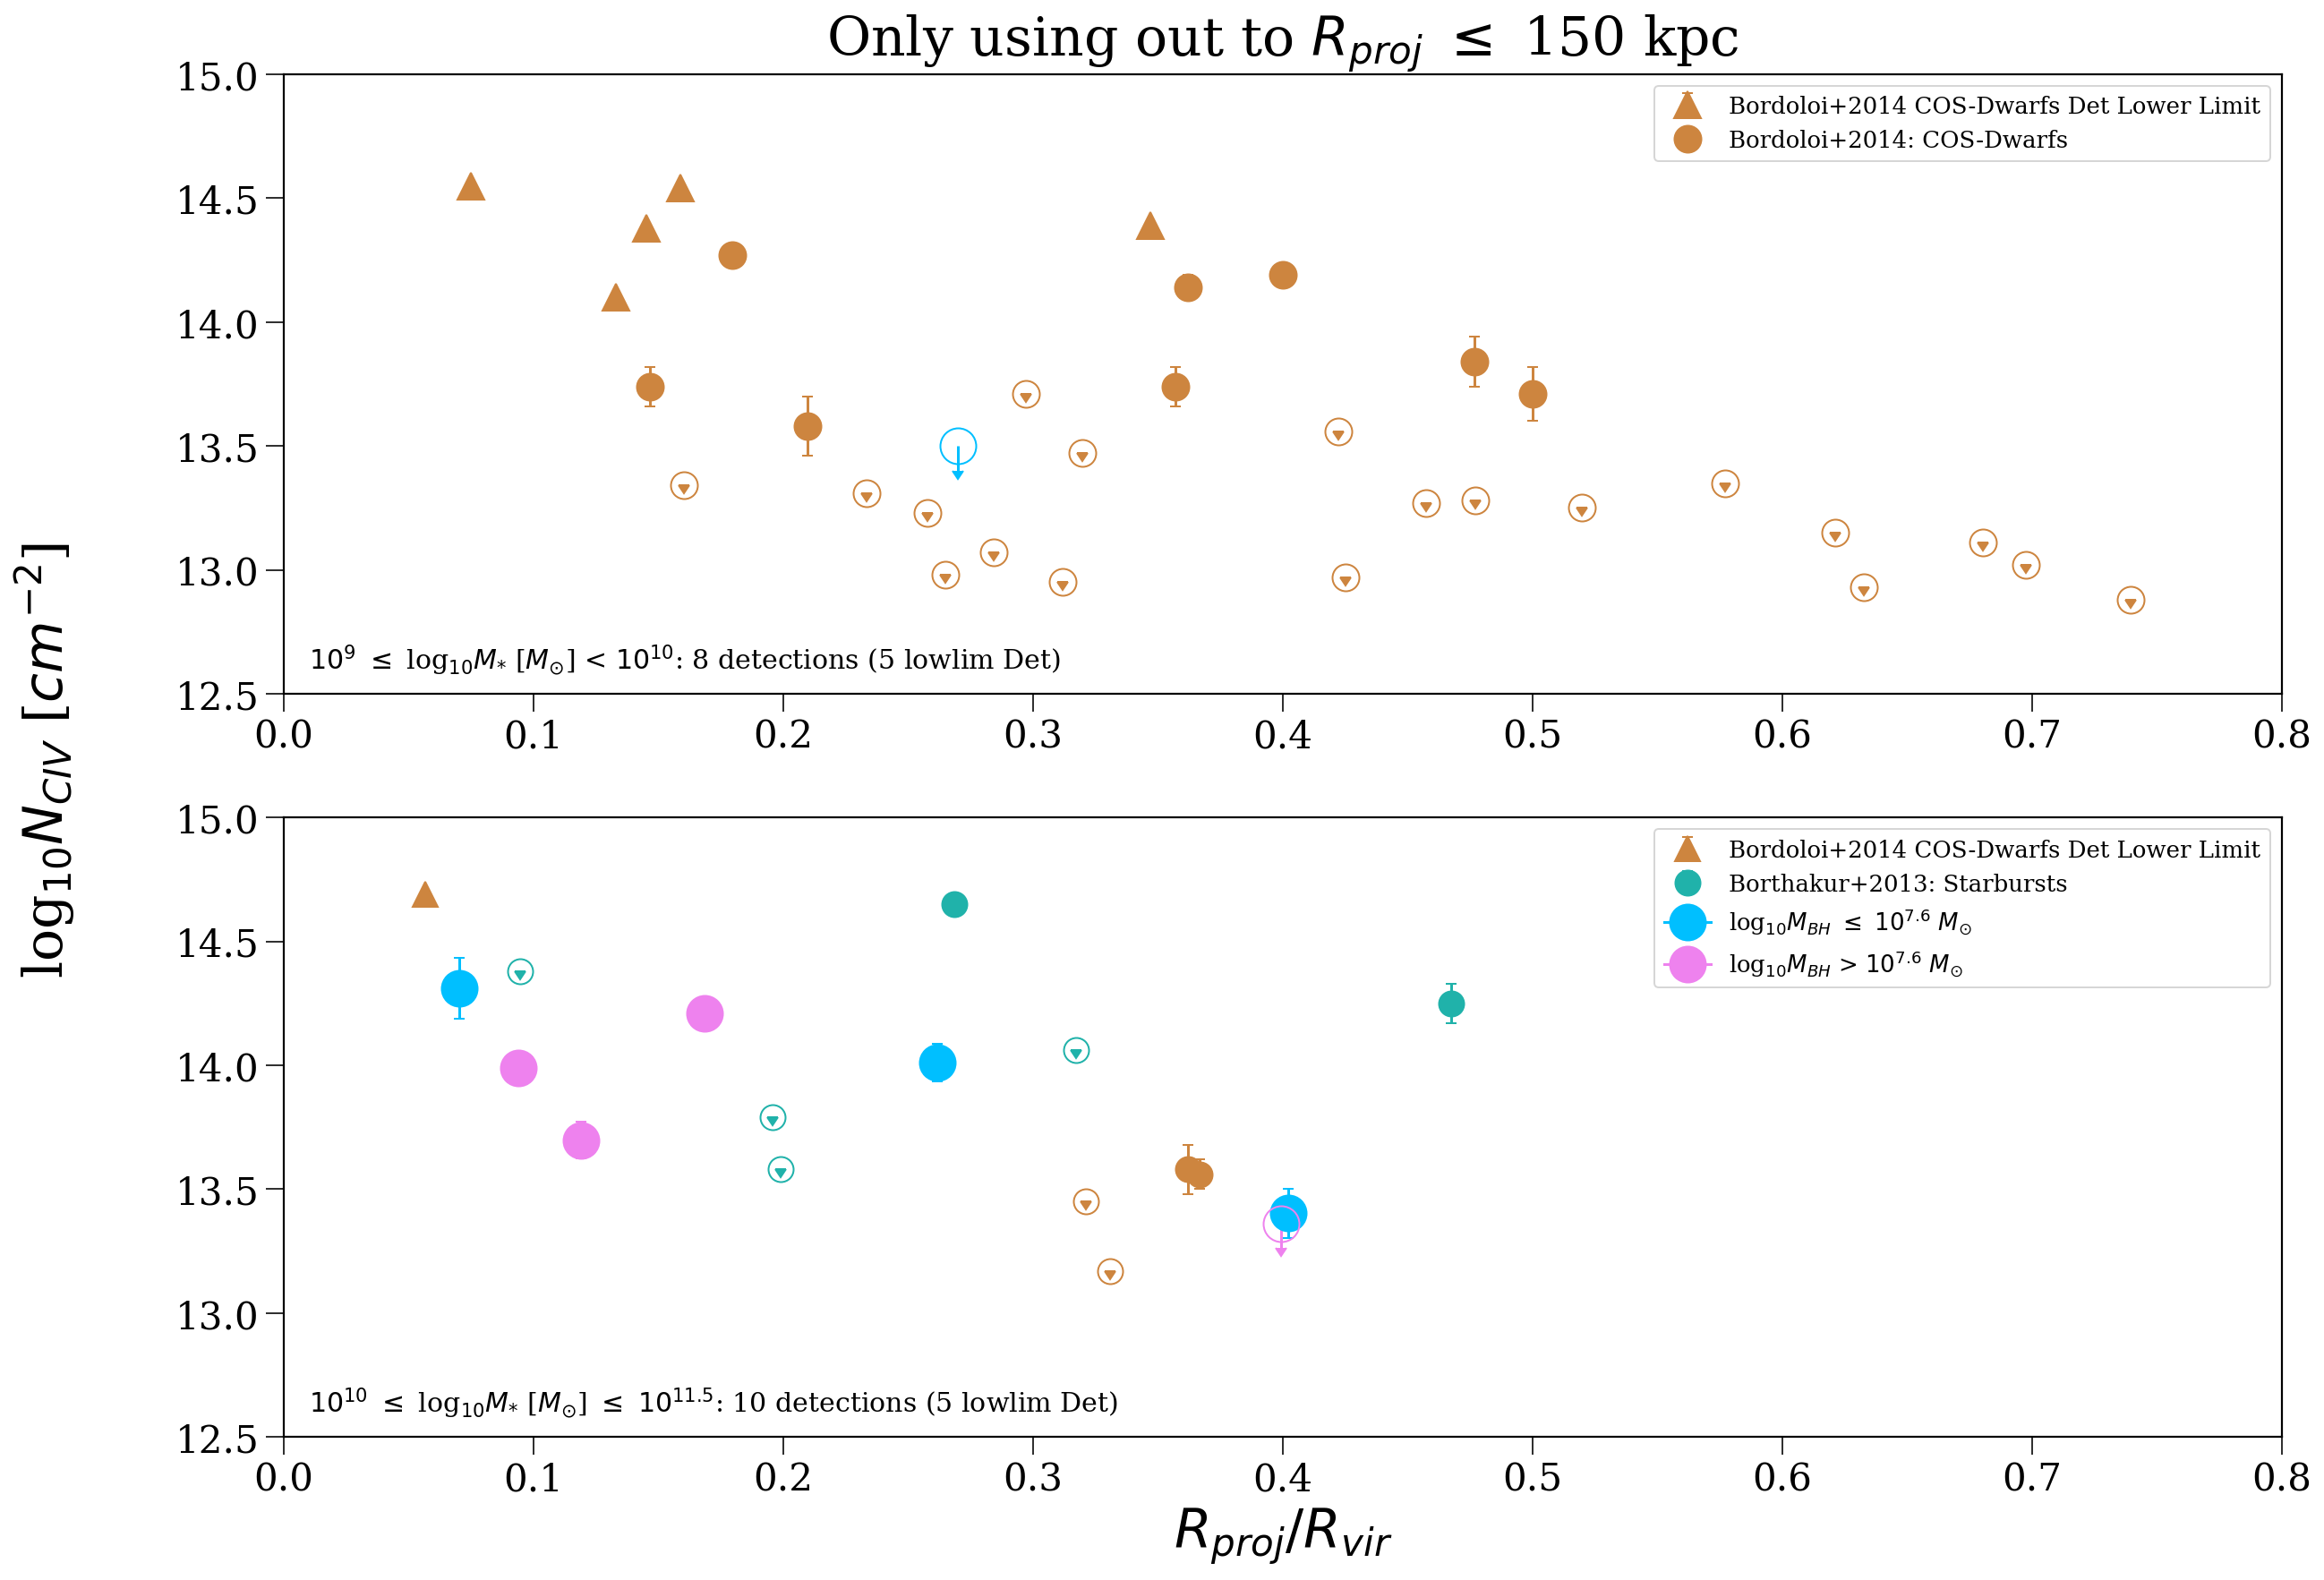

In [22]:
#This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
fig, axs = plt.subplots(2)
#handles, labels = ax.get_legend_handles_labels()
fig.supylabel('log$_{10}N_{CIV}$ [$cm^{-2}$]', fontsize=30)

################ Low Bin Stellar Mass ##############
    #Bordoloi
#Non-Detections
axs[0].errorbar(bordoloi_low['R/Rvir'][:19], bordoloi_low['logNCIV'][:19], yerr = bordoloi_low['err'][:19], capsize=3, c = 'peru', 
            marker = 'o', markersize = 15, ls='none', mfc='none', uplims=True) #upper limit
axs[0].errorbar(bordoloi_low['R/Rvir'][27:], bordoloi_low['logNCIV'][27:], yerr = bordoloi_low['err'][27:], capsize=3, c = 'peru', 
            marker = '^', markersize = 15, ls='none', lolims=True, label = 'Bordoloi+2014 COS-Dwarfs Det Lower Limit') #lower limit
#Detections
axs[0].errorbar(bordoloi_low['R/Rvir'][19:27], bordoloi_low['logNCIV'][19:27], yerr = bordoloi_low['err'][19:27], capsize=3, c = 'peru', 
            marker = 'o', markersize = 15, ls='none', label = 'Bordoloi+2014: COS-Dwarfs') #upper limit
axs[0].set_ylim(12.5,15)
axs[0].set_xlim(0,0.8)
axs[0].set_title('Only using out to $R_{proj}$ $\leq$ 150 kpc', fontsize=30)
axs[0].annotate('$10^{9}$ $\leq$ log$_{10}M_{*}$ [$M_{\odot}$] < $10^{10}$: 8 detections (5 lowlim Det)', (0.01, 12.6), fontsize=15)
axs[0].legend(loc=1)

#J1222 - NGC 4248 (3)
axs[0].errorbar (rproj[3]/rvir[3], np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)

############### High Bin Stellar Mass ##############

#Non-Detections
    #Bordoloi
axs[1].errorbar(bordoloi_high['R/Rvir'][:2], bordoloi_high['logNCIV'][:2], yerr = bordoloi_high['err'][:2], capsize=3, c = 'peru', 
            marker = 'o', markersize = 14, ls='none', mfc='none', uplims=True) #upper limit

    #Borthakur 
axs[1].errorbar(borthakur_high['rhokpc[i]/rvir[i]'][:4], borthakur_high['logNCIV[i]'][:4], yerr = borthakur_high['err'][:4], capsize=3, 
                c = 'lightseagreen', marker = 'o', markersize = 14, ls='none', mfc='none', uplims=True) #upper limit
#Detections
    #Bordoloi
axs[1].errorbar(bordoloi_high['R/Rvir'][2:4], bordoloi_high['logNCIV'][2:4], yerr = bordoloi_high['err'][2:4], capsize=3, c = 'peru', 
            marker = 'o', markersize = 14, ls='none')
axs[1].errorbar(bordoloi_high['R/Rvir'][4:], bordoloi_high['logNCIV'][4:], yerr = bordoloi_high['err'][4:], capsize=3, c = 'peru', 
            marker = '^', markersize = 14, ls='none', lolims=True, label = 'Bordoloi+2014 COS-Dwarfs Det Lower Limit') #lower limit 
    #Borthakur
axs[1].errorbar(borthakur_high['rhokpc[i]/rvir[i]'][4:], borthakur_high['logNCIV[i]'][4:], yerr = borthakur_high['err'][4:], capsize=3, 
                c = 'lightseagreen', marker = 'o', markersize = 14, ls='none', label = 'Borthakur+2013: Starbursts') 

#####COS-HOLES DATA##### 
#J1159
plt.errorbar(rproj[1]/rvir[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
plt.errorbar(rproj[4]/rvir[4], np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1051
plt.errorbar(rproj[5]/rvir[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6],capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(rproj[6]/rvir[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2],capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(rproj[7]/rvir[7], civ_df_J0246['N'][2], civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now)
plt.errorbar(rproj[0]/rvir[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], c = 'deepskyblue', 
             marker=".", markersize=40, capsize = 3)

#J1235 - NGC 4564 (8)
plt.errorbar (rproj[8]/rvir[8], np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'violet', 
              marker=".",mfc='none',markersize=40)

axs[1].set_xlim(0,0.8)
axs[1].set_ylim(12.5,15)
axs[1].legend(loc=1)
axs[1].annotate('$10^{10}$ $\leq$ log$_{10}M_{*}$ [$M_{\odot}$] $\leq$ $10^{11.5}$: 10 detections (5 lowlim Det)', (0.01, 12.6), fontsize=15)
axs[1].set_xlabel('$R_{proj}/R_{vir}$', fontsize=30)
plt.show()

Notes: 
- Low Stellar Mass Sample: 
    - ONLY Bordoloi is in that sample 
- High Stellar Mass Sample: 
    - ALL COS-Holes Data is in this sample 
    - Some borthakur and bordoloi 
    
Want to separate the samples already into high and low sample detections and non detections: 
- Low sample detections (including the five lower limits => counting as a detection but marking different in the plot)
- Low sample upper limits 
- High sample detections (including the one lower limit => counting as a detection but marking different in the plot)
- High sample upper limits 

In [23]:
######### LOW MASS SAMPLE ######### 

#Detections 
low_sample_det = np.concatenate((bordoloi_low['logNCIV'][19:27], bordoloi_low['logNCIV'][27:]), axis=0)
print('Low Mass Sample Detections:', low_sample_det.shape)

#Upper Limits (non det) 
low_sample_uplim = np.array(bordoloi_low['logNCIV'][:19])
print('Low Mass Sample Upper Limits:', low_sample_uplim.shape)

######### LOW MASS SAMPLE ######### 

#Detections 
high_sample_lit_det = np.concatenate((bordoloi_high['logNCIV'][2:4], bordoloi_high['logNCIV'][4:],  borthakur_high['logNCIV[i]'][4:]),
                                     axis=0)
high_sample_cosholes_det = np.stack(( civ_df_J1159['N'][0], np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
                                     civ_df_J1051['N'][6], civ_df_J1123['N'][2], civ_df_J0246['N'][2], civ_df_J1101['N'][4]), axis=0)
high_sample_det = np.concatenate((high_sample_lit_det, high_sample_cosholes_det),axis=0)
print('High Mass Sample Detections:', high_sample_det.shape)

#Upper Limits (non det) 
high_sample_lit_uplim = np.concatenate((bordoloi_high['logNCIV'][:2], borthakur_high['logNCIV[i]'][:4]),axis=0)
high_sample_cosholes_uplim = np.array([np.log10(10**13.17+10**13.48)])
high_sample_uplim = np.concatenate((high_sample_lit_uplim, high_sample_cosholes_uplim),axis=0)
print('High Mass Sample Upper Limits', high_sample_uplim.shape)

Low Mass Sample Detections: (13,)
Low Mass Sample Upper Limits: (19,)
High Mass Sample Detections: (11,)
High Mass Sample Upper Limits (7,)


<>:10: DeprecationWarning: invalid escape sequence \l
<>:10: DeprecationWarning: invalid escape sequence \l
<>:10: DeprecationWarning: invalid escape sequence \l
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_1004/463993776.py:10: DeprecationWarning: invalid escape sequence \l
  plt.title('$10^{10}$ $\leq$ log$_{10}M_{*}$[$M_{\odot}$] $\leq$ $10^{11.5}$')


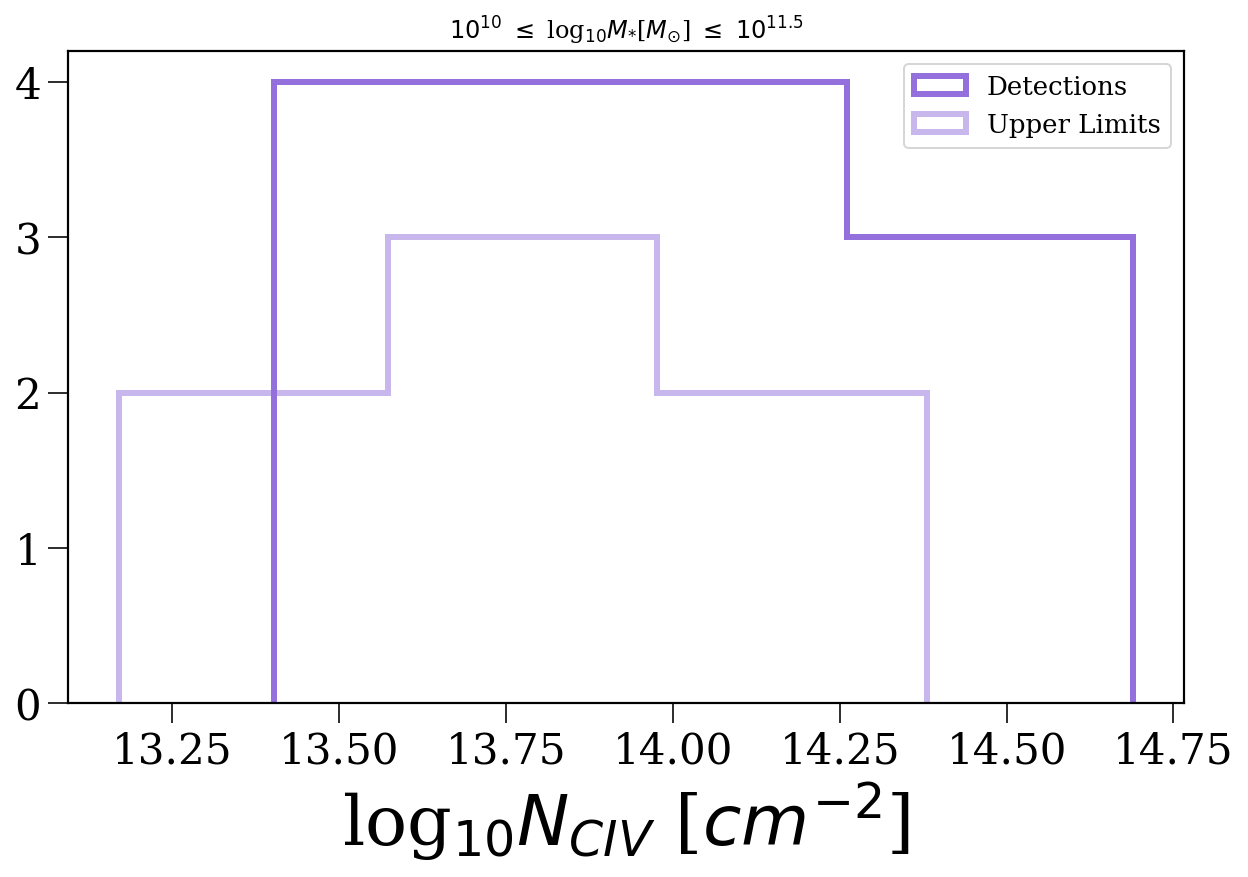

In [24]:
# Now that I have split into 4 different arrays I want to make some histograms of the new samples 

####### HIGH MASS SAMPLE #######

plt.figure(1, figsize=(10,6))
plt.hist(high_sample_det, bins = 'fd', histtype = 'step', lw= 3, color = 'mediumpurple', label = 'Detections')
plt.hist(high_sample_uplim, bins = 'fd', histtype = 'step', lw= 3, color = 'mediumpurple', alpha = 0.5, label = 'Upper Limits')
plt.legend()
plt.xlabel('log$_{10}N_{CIV}$ [$cm^{-2}$]')
plt.title('$10^{10}$ $\leq$ log$_{10}M_{*}$[$M_{\odot}$] $\leq$ $10^{11.5}$')
plt.show()

<>:8: DeprecationWarning: invalid escape sequence \l
<>:8: DeprecationWarning: invalid escape sequence \l
<>:8: DeprecationWarning: invalid escape sequence \l
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_1004/1637230609.py:8: DeprecationWarning: invalid escape sequence \l
  plt.title('$10^{9}$ $\leq$ log$_{10}M_{*}$[$M_{\odot}$] < $10^{10}$')


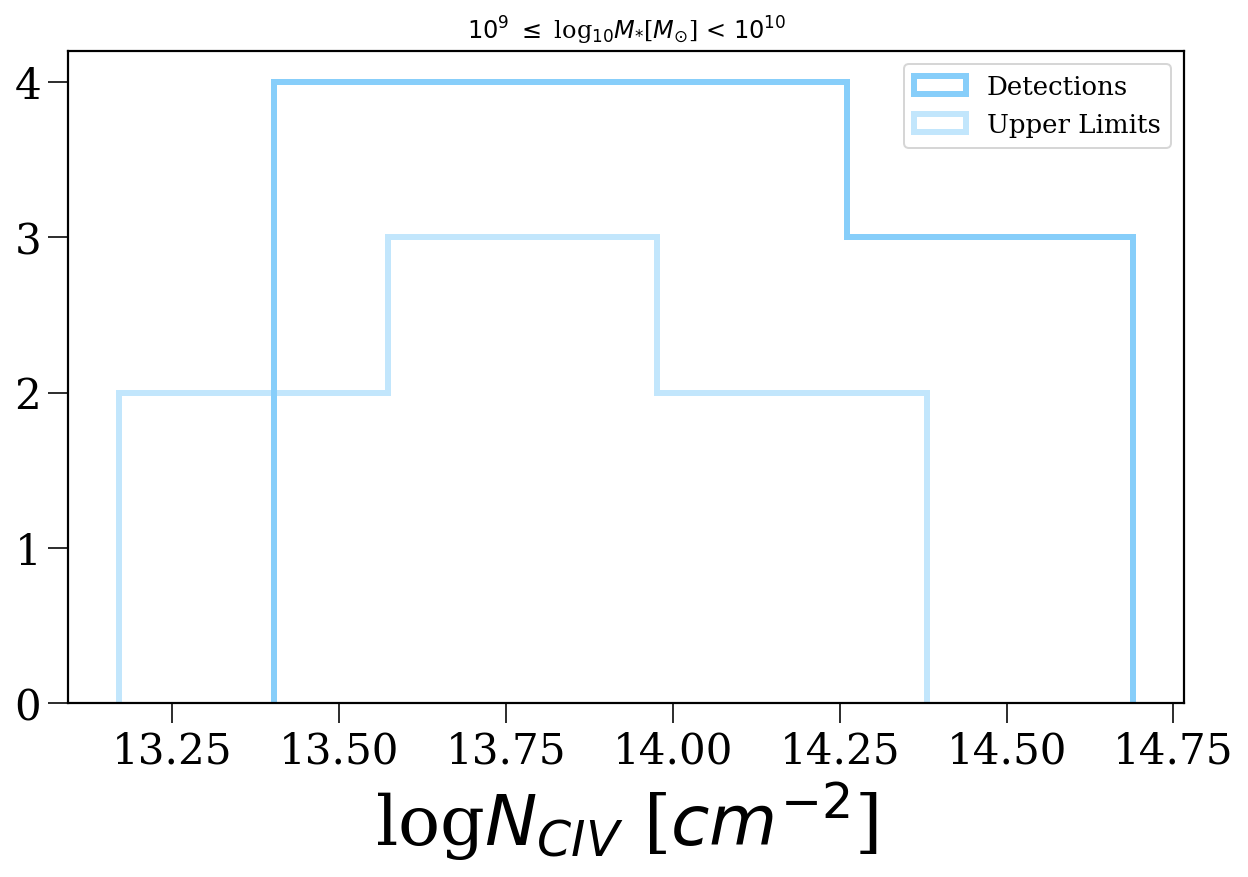

In [25]:
####### HIGH MASS SAMPLE #######

plt.figure(1, figsize=(10,6))
plt.hist(high_sample_det, bins = 'fd', histtype = 'step', lw= 3, color = 'lightskyblue', label = 'Detections')
plt.hist(high_sample_uplim, bins = 'fd', histtype = 'step', lw= 3, color = 'lightskyblue', alpha = 0.5, label = 'Upper Limits')
plt.legend()
plt.xlabel('log$N_{CIV}$ [$cm^{-2}$]')
plt.title('$10^{9}$ $\leq$ log$_{10}M_{*}$[$M_{\odot}$] < $10^{10}$')
plt.show()

## 2 Sample KS-Test for COS-Holes and Literature Data in 2 stellar mass samples

- Wiki about the KS-Test: https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test#:~:text=The%20two%2Dsample%20K%E2%80%93S,functions%20of%20the%20two%20samples.
    - The two-sample K–S test is one of the most useful and general nonparametric methods for comparing two samples, as it is sensitive to differences in both location and shape of the empirical cumulative distribution functions of the two samples.
    - In practice, the statistic requires a relatively large number of data points (in comparison to other goodness of fit criteria such as the Anderson–Darling test statistic) to properly reject the null hypothesis.
    - Info on the null hypothesis: 
        - from and example => Since the p-value is less than .05, we reject the null hypothesis. We have sufficient evidence to say that the two sample datasets do not come from the same distribution. So if the p-value is greater than 0.05 then we cannot reject the null hypothesis and thus these datasets come from the same distribution... 
            
- https://www.statology.org/kolmogorov-smirnov-test-python/
    - This was giving me examples of how to use the "from scipy.stats import ks_2samp" package 
    
### Main Question that we are Trying to answer: 
What is the probability that these two sets of samples were drawn from the same (but unknown) probability distribution?
- What we are hoping to get is that the two samples (low and high) are not from the sample sample 

In [26]:
from scipy import stats
from scipy.stats import kstest
from scipy.stats import ks_2samp

In [27]:
#Running an uncensored (upper limits not included) 2 sample ks test 

print(stats.ks_2samp(high_sample_det, low_sample_det))
print('pval > 0.05 so data sets come from the same distribution... sadness')

KstestResult(statistic=0.2867132867132867, pvalue=0.6076508406566288)
pval > 0.05 so data sets come from the same distribution... sadness


### Want to figure out how to run a censored 2 sample KS-Test....

## CIV Excess and Linear Regression 

In [28]:
#Just bringing in the smaller data sets because they are easier to make a line through them 

#smaller df 
qso_B13 = np.array(borthakur_no_zero['galname[i]'])
mstar_B13 = np.array(borthakur_no_zero['mstar[i]'])

borthakur_smol= pd.DataFrame({"QSOname":qso_B13, "Smass":mstar_B13, "Rproj":Rp_B13, "CIVN":civ_B13, "CIVsigN":civ_err_B13})
borthakur_smol

,QSOname,Smass,Rproj,CIVN,CIVsigN
0,J075622.09+304329.0,11.02,193.9,14.10,0.00
1,J161708.92+063822.2,11.39,103.2,14.38,0.00
2,J154527.12+484642.2,10.50,64.7,13.79,0.00
3,J151136.53+402852.6,10.67,177.0,14.16,0.00
4,J132150.89+033034.1,10.81,140.2,14.06,0.00
5,J161913.50+334146.8,11.04,150.9,13.67,0.00
6,J120314.43+480316.4,10.78,187.4,14.14,0.00
7,J100801.20+500915.6,10.39,186.6,13.86,0.00
8,J085254.99+030908.3,10.32,179.1,13.75,0.00
9,J085252.73+031320.4,10.92,171.9,14.10,0.00


In [29]:
#smaller df

qso_B14 = np.array(bordoloi['QSO'])
mstar_B14 = np.array(bordoloi['logM*'])

bordoloi_smol= pd.DataFrame({"QSOname":qso_B14, "Smass":mstar_B14, "Rproj":Rp_B14, "CIVN":civ_B14, "CIVsigN":civ_err_B14})
bordoloi_smol

,QSOname,Smass,Rproj,CIVN,CIVsigN
0,PG1049-005,9.6,58,12.98,0.00
1,J1451+2709,8.3,135,13.09,0.00
2,J1342+0505,9.4,116,13.35,0.00
3,J1211+3657,10.1,90,13.17,0.00
4,J1121+0325,10.1,89,13.45,0.00
5,J1001+5944,8.7,135,12.89,0.00
6,J0155+0857,9.0,105,13.15,0.00
7,J0310-0049,8.5,101,13.04,0.00
8,J0242-0759,8.9,126,13.23,0.00
9,J1521+0337,9.5,87,13.56,0.00


In [30]:
lit_data = pd.concat([borthakur_smol, bordoloi_smol])
lit_data

,QSOname,Smass,Rproj,CIVN,CIVsigN
0,J075622.09+304329.0,11.02,193.9,14.10,0.0
1,J161708.92+063822.2,11.39,103.2,14.38,0.0
2,J154527.12+484642.2,10.50,64.7,13.79,0.0
3,J151136.53+402852.6,10.67,177.0,14.16,0.0
4,J132150.89+033034.1,10.81,140.2,14.06,0.0
...,...,...,...,...,...
38,J0826+0742,9.70,77.0,14.39,0.0
39,J0959+0503,10.00,14.0,14.69,0.0
40,J1236+2641,9.40,28.0,14.38,0.0
41,J0042+1037,9.60,15.0,14.55,0.0


In [31]:
##### Literature Data #####

XX =  np.copy(lit_data['Rproj']) #Getting the impact parameter from my galaxy parameters table 
YY = np.copy(lit_data["CIVN"]) #getting the column density of CIV from main data table 
YY_err = np.copy(lit_data["CIVsigN"]) #column density error of CIV 
has_UL = YY_err <= 0 #determining the ones that have upper limts (in his table they are denoted with -1 in the error column) T/F

Ylim = np.zeros_like(XX, dtype = int) #Return an array of zeros with the same shape and type as the impact parameters (XX)
Ylim[has_UL] = 1 #if this array has a -1 values (upper limit) then it is given the value of 1 
Xlim = np.zeros_like(XX, dtype = int) #Return an array of zeros with the same shape and type as the impact parameters (XX)

coeff = "kendallt" # the correlation coefficient 
Nboot = 10_000 #number of bootstrapping iterations over which the uncertainties are estimated 

xL = XX #same as XX => impact parameters 
yL = YY #same as YY => column densities 
yL_err = YY_err #same as YY_err => column density error 
xlimL = Xlim #array of 0s same length as XX or Xlim 
ylimL = Ylim #array od 0s and 1s same length as YY or Ylim (1 if it is an upper limit)

kwargs = {"return_dist":True}
res = pymccorrelation(xL, yL, xlim = xlimL, ylim = ylimL, coeff = coeff, Nboot = Nboot, **kwargs)

outL = {} #Where the stat information is stored 

outL["coeff_percentiles"] = res[0]
outL["p-value_percentiles"] = res[1]
outL["coeff_dist"] = res[2]
outL["p-value_dist"] = res[3]

In [36]:
# LINEAR REGRESSION FOR ALL THE LITERATURE DATA

upper_lim_L = yL_err < 0 #a mask to find the upper limits for later stuff I think 

delta_L = np.invert(upper_lim_L) #array of True and False 
xsig_L = np.zeros_like(xL) #array of 0s like xC => like XX => the impact parameters bc they dont have error oh i see
ysig_L = yL_err[:] #error of the column densities 

lmcens_L = linmix.LinMix(xL, yL, xsig_L, ysig_L, delta=delta_L, K=2)
lmcens_L.run_mcmc(silent=True)

yints_L = lmcens_L.chain['alpha'] #same shape as the Nboot (looks like 12-14 values)
slopes_L = lmcens_L.chain['beta'] #same shape as the Nboot (looks like very very small values)

mean_yint_L = yints_L.mean() #mean alpha value (~14)
mean_slope_L = slopes_L.mean() #mean beta value (~ -0.010)

xx = np.linspace(0,220,1000) #This is how long the line is gonna be
all_lines_L = np.array([m*xx + b for (m,b) in zip(slopes_L, yints_L)]) #makng the equation

lo_line_L, med_line_L, hi_line_L = np.percentile(all_lines_L, (16,50,84), axis = 0) #percentiles for stats knowledge
mean_line_L = mean_slope_L*xx + mean_yint_L #mean line equation

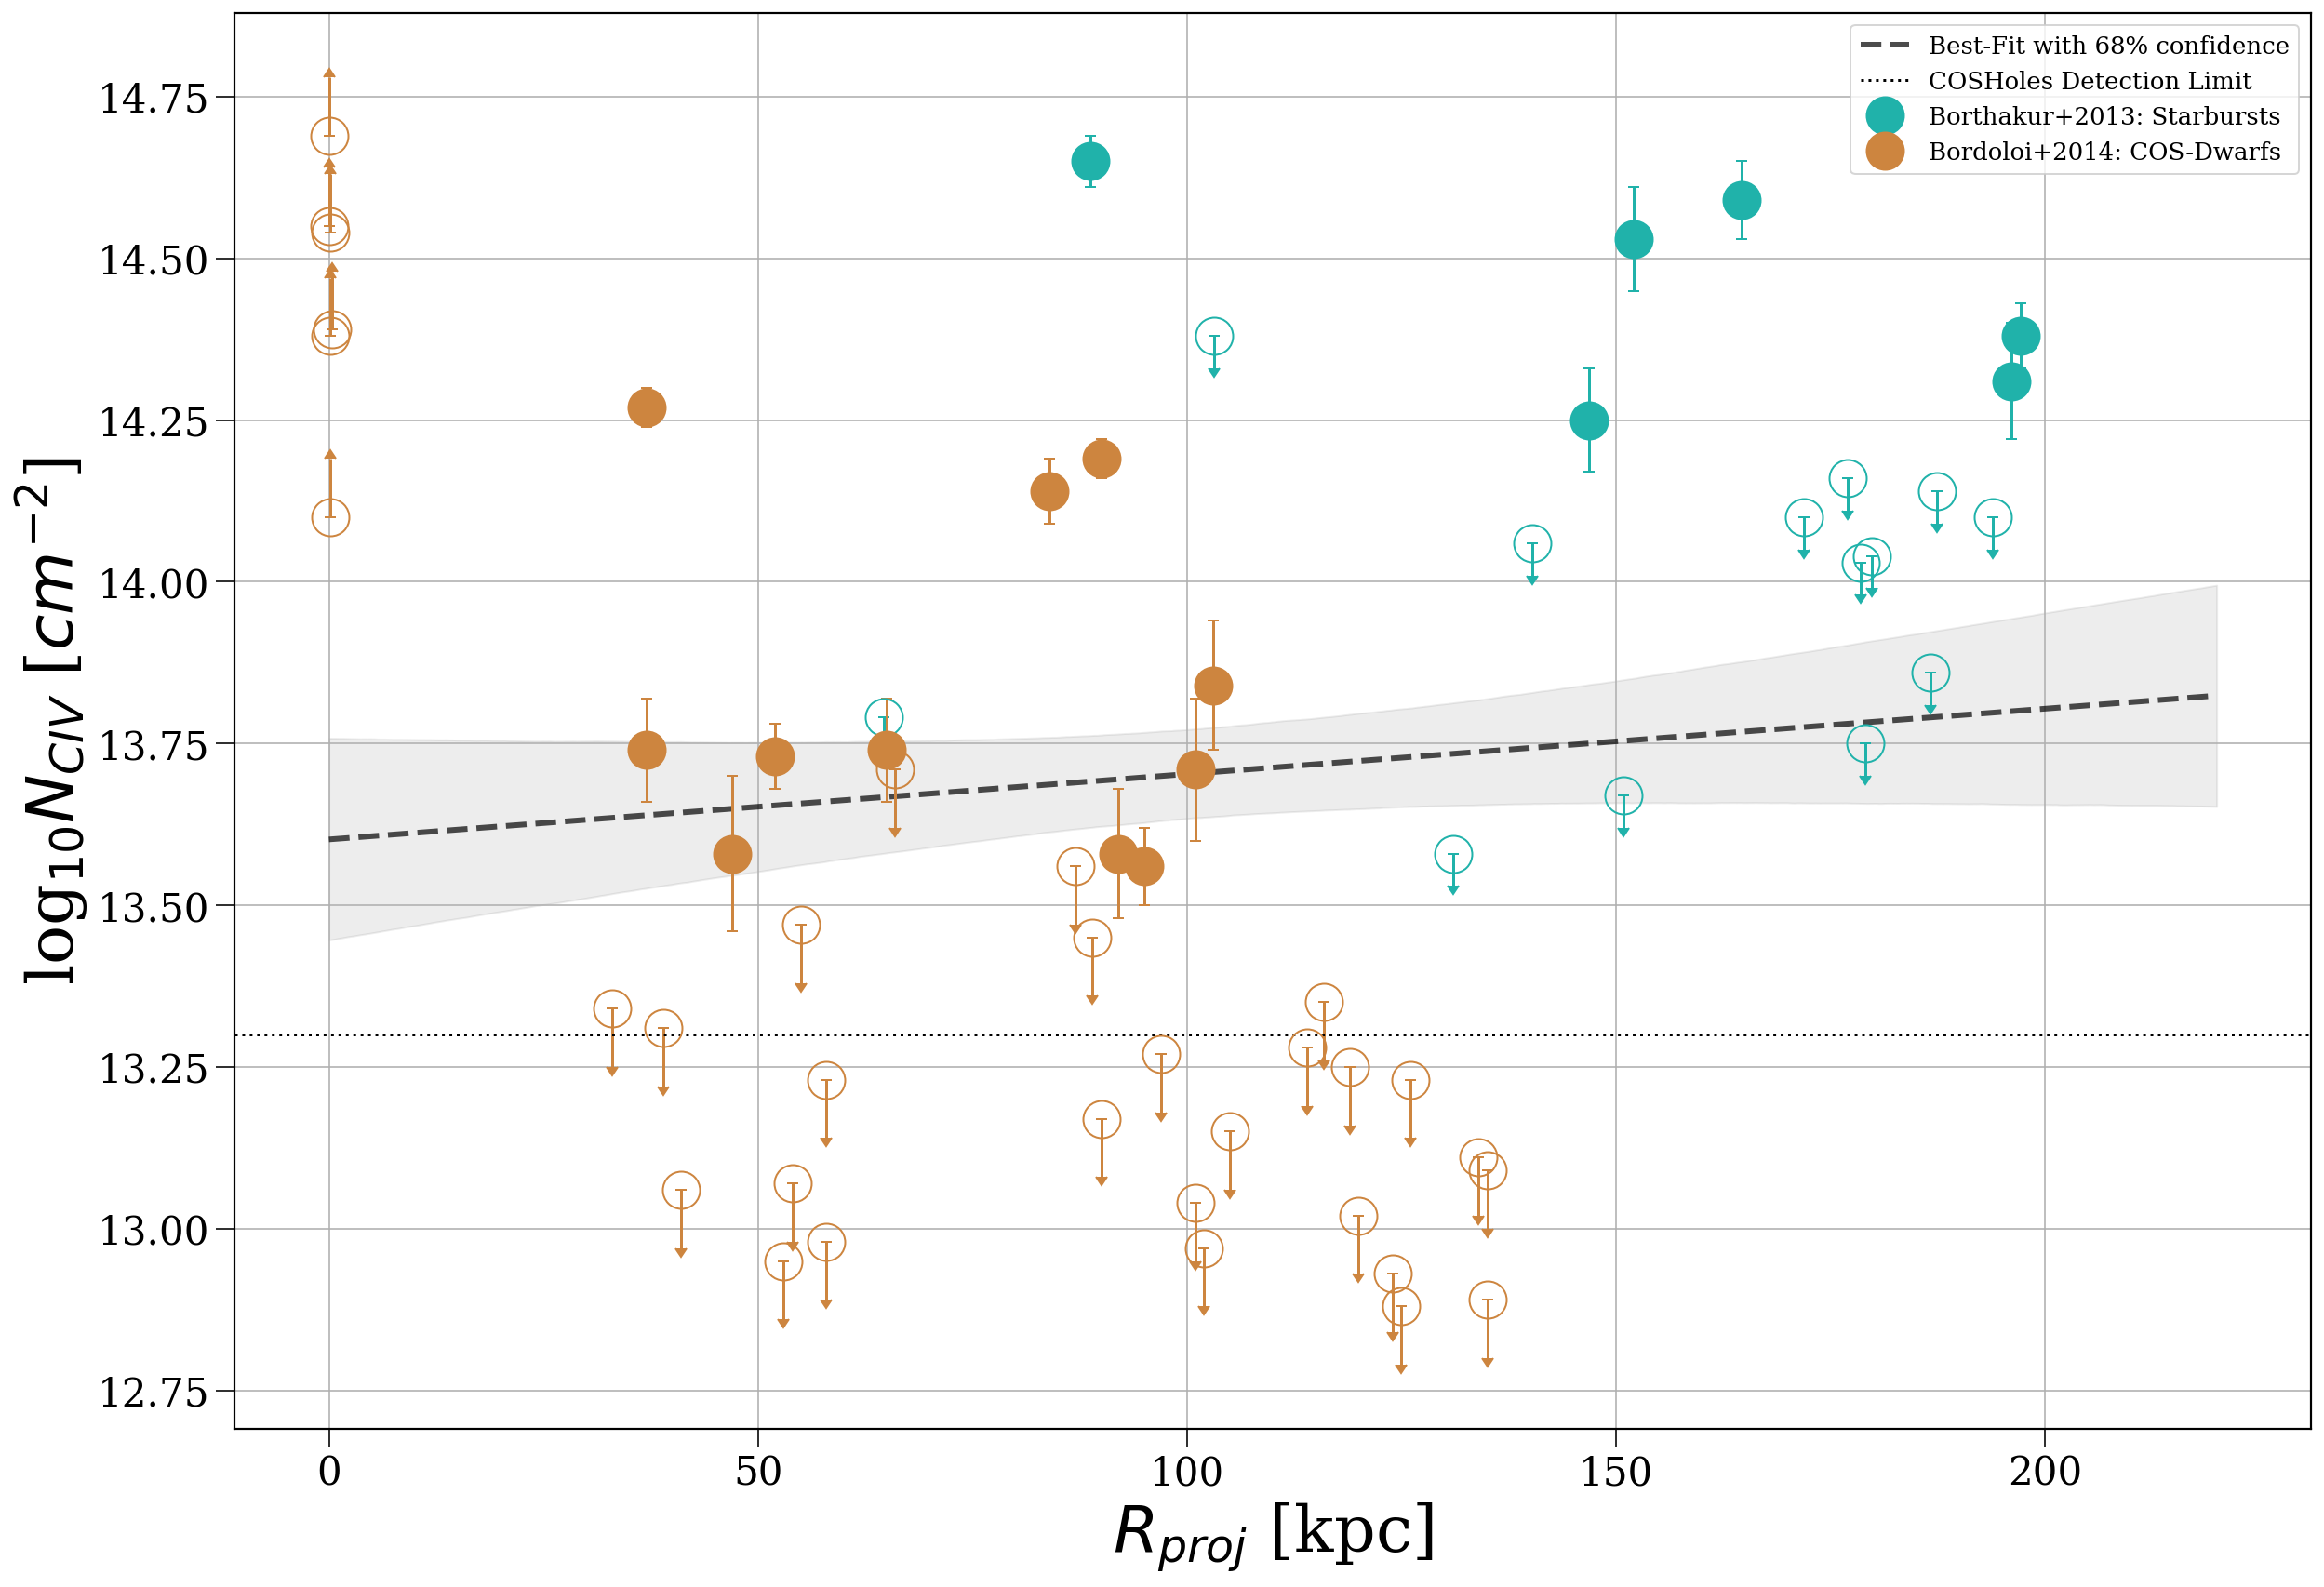

In [40]:
#Plotting the fits 

plt.plot(xx, mean_line_L, color = 'k', lw = 3, ls = "--", alpha = 0.7, label='Best-Fit with 68% confidence')
plt.fill_between(xx, lo_line_L, hi_line_L, color = "k", alpha = 0.07)

########Borthakur 2013
#Non-Detections
plt.errorbar(Rp_B13[:13], civ_B13[:13], yerr = civ_err_B13[14], capsize=3, c = 'lightseagreen', 
             marker = 'o', markersize=20, ls='none', mfc='none', uplims=True)
#Detections
plt.errorbar(Rp_B13[13:], civ_B13[13:], yerr = civ_err_B13[13:], capsize=3, c = 'lightseagreen', label = 'Borthakur+2013: Starbursts', 
             marker = 'o', markersize=20, ls='none')

#######Bordoloi 2014
#Non-Detections
plt.errorbar(Rp_B14[:26], civ_B14[:26], yerr = civ_err_B13[15], capsize=3, c = 'peru', 
            marker = 'o', markersize = 20, ls='none', mfc='none', uplims=True)
plt.errorbar(RpRv_B14[37:], civ_B14[37:], yerr = civ_err_B13[15], capsize=3, c = 'peru', 
            marker = 'o', markersize = 20, ls='none', mfc='none', lolims=True)
#Detections
plt.errorbar(Rp_B14[26:37], civ_B14[26:37], yerr = civ_err_B14[26:37], capsize=3, c = 'peru', label = 'Bordoloi+2014: COS-Dwarfs', 
            marker = 'o', markersize = 20, ls='none')


plt.xlabel('$R_{proj}$ [kpc]')
plt.ylabel('log$_{10}N_{CIV}$ [$cm^{-2}$]')
plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.ylim(12.6,15)
#plt.xscale("log")
plt.legend()
plt.grid(True)
plt.show()